In [47]:
import pandas as pd
import numpy as np

import re

import geopandas as gpd

import matplotlib.pyplot as plt

from shapely.geometry import box, mapping, polygon, multipolygon, Point
from foursquare import fetch_venue_categories, generate_square_grid, search_city_venues, fetch_venue_likes
from geojson import Feature, FeatureCollection, dump

ImportError: cannot import name 'fetch_venue_likes' from 'foursquare' (/Users/akbarry/src/Coursera_Capstone/foursquare.py)

In [2]:
f = fetch_venue_categories()

In [5]:
cats = pd.DataFrame(f)
cats

,name,id,category,cat_id
0,Amphitheater,56aa371be4b08b9a8d5734db,Arts & Entertainment,4d4b7104d754a06370d81259
1,Aquarium,4fceea171983d5d06c3e9823,Arts & Entertainment,4d4b7104d754a06370d81259
2,Arcade,4bf58dd8d48988d1e1931735,Arts & Entertainment,4d4b7104d754a06370d81259
3,Art Gallery,4bf58dd8d48988d1e2931735,Arts & Entertainment,4d4b7104d754a06370d81259
4,Bowling Alley,4bf58dd8d48988d1e4931735,Arts & Entertainment,4d4b7104d754a06370d81259
...,...,...,...,...
926,Train Station,4bf58dd8d48988d129951735,Travel & Transport,4d4b7105d754a06379d81259
927,Tram Station,52f2ab2ebcbc57f1066b8b51,Travel & Transport,4d4b7105d754a06379d81259
928,Transportation Service,54541b70498ea6ccd0204bff,Travel & Transport,4d4b7105d754a06379d81259
929,Travel Lounge,4f04b25d2fb6e1c99f3db0c0,Travel & Transport,4d4b7105d754a06379d81259


In [13]:
cats[cats.category=='Food']

,name,id,category,cat_id
114,Afghan Restaurant,503288ae91d4c4b30a586d67,Food,4d4b7105d754a06374d81259
115,Ethiopian Restaurant,4bf58dd8d48988d10a941735,Food,4d4b7105d754a06374d81259
116,African Restaurant,4bf58dd8d48988d1c8941735,Food,4d4b7105d754a06374d81259
117,New American Restaurant,4bf58dd8d48988d157941735,Food,4d4b7105d754a06374d81259
118,American Restaurant,4bf58dd8d48988d14e941735,Food,4d4b7105d754a06374d81259
...,...,...,...,...
457,Varenyky restaurant,52e928d0bcbc57f1066b7e9a,Food,4d4b7105d754a06374d81259
458,West-Ukrainian Restaurant,52e928d0bcbc57f1066b7e9b,Food,4d4b7105d754a06374d81259
459,Ukrainian Restaurant,52e928d0bcbc57f1066b7e96,Food,4d4b7105d754a06374d81259
460,Vegetarian / Vegan Restaurant,4bf58dd8d48988d1d3941735,Food,4d4b7105d754a06374d81259


In [57]:
districts_gdf = gpd.read_file('data/Bangkok_neighbourhoods.json')
# Preserve id for dissolve bounds operation below
districts_gdf = districts_gdf[['NAME_0', 'NAME_2', 'geometry']]
districts_gdf.columns = ['subject','district','geometry']
districts_gdf

,subject,district,geometry
0,Thailand,Ban Na,"MULTIPOLYGON (((101.06481 14.41179, 101.06536 ..."
1,Thailand,Ongkharak,"MULTIPOLYGON (((100.97552 14.23500, 100.97700 ..."
2,Thailand,Bang Len,"MULTIPOLYGON (((100.28336 14.14591, 100.28307 ..."
3,Thailand,Phuttha Mon Thon,"MULTIPOLYGON (((100.32971 13.80120, 100.33000 ..."
4,Thailand,Bang Su,"MULTIPOLYGON (((100.53735 13.83085, 100.53590 ..."
...,...,...,...
80,Thailand,Bang Bo,"MULTIPOLYGON (((100.93635 13.66819, 100.93792 ..."
81,Thailand,Phra Samut Jadee,"MULTIPOLYGON (((100.55722 13.61222, 100.55778 ..."
82,Thailand,Krathum Baen,"MULTIPOLYGON (((100.33558 13.72002, 100.33561 ..."
83,Thailand,Muang Samut Sakhon,"MULTIPOLYGON (((100.34015 13.64018, 100.34168 ..."


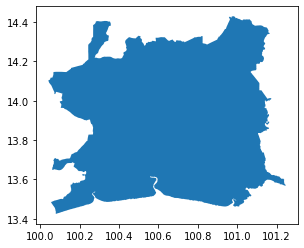

In [62]:
bangkok_gdf = districts_gdf.dissolve(by='subject')
bangkok_gdf.plot()
plt.show()

In [2]:
bangkok_gdf = gpd.read_file('data/Bangkok_district_bounds.geojson')
bangkok_gdf.geometry

0    POLYGON ((101.14380 13.65193, 101.14413 13.651...
Name: geometry, dtype: geometry

In [6]:
def generate_city_grid(c, gdf, grid_threshold=0.05):
    
    city_filename = re.sub(r'[^A-Za-z]','',c)

    grid = generate_square_grid(gdf.geometry, grid_threshold)

    cfs = {'city_name': c}

    feature_list = [Feature(geometry=g) for g in grid]
    feature_collection = FeatureCollection(feature_list) 

    with open(f'data/{city_filename}_districts_grid.geojson', 'w') as f:
       dump(feature_collection, f)

    print('Saved grid to file.')

In [7]:
generate_city_grid('Bangkok', bangkok_gdf)

1.2059019999998668
1.0037970000000769
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int POLYGON ((100.05 14.08481268719664, 100.049461 14.08543100000009, 100.0469360000001 14.08895000000012, 100.0454410000001 14.09073900000016, 100.0417347860579 14.1, 100.05 14.1, 100.05 14.08481268719664))
int POLYGON ((100.0417347860579 14.1, 100.0409460000001 14.10197100000011, 100.042877 14.10384200000004, 100.04596 14.10506099999998, 100.048944 14.10676200000006, 100.049912 14.10889000000009, 100.05 14.10897310612254, 100.05 14.1, 100.0417347860579 14.1))
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int

int POLYGON ((100.15 13.68333819162148, 100.1476830000001 13.68336199999999, 100.1443320000001 13.68320200000011, 100.13987 13.68257100000011, 100.1374360000001 13.682211, 100.1346280000001 13.68085000000002, 100.132203 13.67795100000012, 100.131241 13.67694199999994, 100.1279290000001 13.67344100000003, 100.1260830000001 13.67186200000009, 100.1244130000001 13.66823100000005, 100.1224890000001 13.66508099999999, 100.119262 13.66088999999999, 100.115914 13.6571110000001, 100.112892 13.65397899999999, 100.1088549999999 13.65078199999994, 100.1074641848636 13.65, 100.1 13.65, 100.1 13.69613815022227, 100.1006620000001 13.69621200000006, 100.1032490000001 13.69686100000013, 100.1052930000001 13.697632, 100.1072010000001 13.69838200000004, 100.108767334891 13.7, 100.15 13.7, 100.15 13.68333819162148))
int POLYGON ((100.108767334891 13.7, 100.1096870000001 13.70095000000003, 100.112664 13.70054000000005, 100.1147990000001 13.70175900000004, 100.1173410000001 13.70211000000012, 100.120331 13

int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int POLYGON ((100.2 13.91166348981939, 100.1979510000001 13.91218000000009, 100.1938400000001 13.913072, 100.1901770000001 13.91435000000007, 100.187821 13.91610100000014, 100.1846160000001 13.91752000000014, 100.182389 13.91850999999997, 100.178727 13.92008000000004, 100.1758120000001 13.92116000000004, 100.1735990000001 13.92268000000007, 100.1719280000001 13.923991, 100.1700070000001 13.92557000000005, 100.168617 13.927031, 100.1660780000001 13.92864000000009, 100.16288 13.93122, 100.1605300000001 13.93332200000003, 100.15873 13.93488100000008, 100.1570980000001 13.93630999999999, 100.1552879999999 13.93782100000016, 100.1536790000001 13.93963000000008, 100.1512970000001 13.94219000000015, 100.15 13.94299379005072, 100.15 13.95, 100.2 13.95, 100.2 13.91166348981939))
int POLYGON ((100.2 13.95, 100.15 13.95, 100.15 14, 100.2 14, 100.2 13.95))
int POLYGON ((100.2 14, 100.15 14, 100.15 14.05, 100.2 14.05, 100.2 14))
int POLYGON 

int POLYGON ((100.25 14, 100.2 14, 100.2 14.05, 100.25 14.05, 100.25 14))
int POLYGON ((100.25 14.05, 100.2 14.05, 100.2 14.1, 100.25 14.1, 100.25 14.05))
int POLYGON ((100.25 14.1, 100.2 14.1, 100.2 14.15, 100.25 14.15, 100.25 14.1))
int POLYGON ((100.2 14.17780050638282, 100.2156309999999 14.18189100000006, 100.21646 14.18528000000015, 100.218552 14.1873020000001, 100.2212600000001 14.187951, 100.223122 14.18968099999995, 100.2253260000001 14.19095100000004, 100.2259980000001 14.193129, 100.2274020000001 14.19482099999999, 100.2280720000001 14.19568000000004, 100.2331524612466 14.2, 100.25 14.2, 100.25 14.15, 100.2 14.15, 100.2 14.17780050638282))
int POLYGON ((100.2331524612466 14.2, 100.2361290000001 14.20253100000002, 100.243233 14.20859099999996, 100.2445070000001 14.20967099999996, 100.244439 14.21238100000005, 100.244332 14.21712000000008, 100.2443090000001 14.21813199999997, 100.2443090000001 14.22072100000014, 100.244218 14.23640100000006, 100.2435160530553 14.25, 100.25 14.2

int POLYGON ((100.3 14.15, 100.25 14.15, 100.25 14.2, 100.3 14.2, 100.3 14.15))
int POLYGON ((100.2958256812404 14.25, 100.2940830000001 14.24391100000008, 100.2903519999999 14.23957100000001, 100.2879110000001 14.2385910000001, 100.2815020000001 14.23273200000006, 100.2798380000001 14.22989200000012, 100.2783590000001 14.22296100000005, 100.2757400000001 14.21797000000009, 100.2799070000001 14.21838000000008, 100.2834100000001 14.218321, 100.286475 14.21794000000011, 100.2904590000001 14.21649100000008, 100.292848 14.21558999999996, 100.2978890000001 14.21554000000009, 100.3 14.21530802197809, 100.3 14.2, 100.25 14.2, 100.25 14.25, 100.2958256812404 14.25))
int POLYGON ((100.25 14.29089476923077, 100.250358 14.29129, 100.2519240000001 14.293001, 100.255515 14.29569100000015, 100.2566300000001 14.29856000000007, 100.2576131072211 14.3, 100.3 14.3, 100.3 14.25993904434494, 100.299423 14.25910100000016, 100.2985 14.25650999999999, 100.297057 14.25397100000004, 100.2959290000001 14.250360

int GEOMETRYCOLLECTION EMPTY
int POLYGON ((100.4469529571429 13.5, 100.446662 13.49972100000008, 100.4458320000001 13.49972300000007, 100.445557 13.49944499999998, 100.4430540000001 13.49944499999998, 100.4424980000001 13.49888900000002, 100.4422220000001 13.49889099999996, 100.4419400000001 13.4986110000001, 100.4416659999999 13.4986110000001, 100.4413900000001 13.498333, 100.440278 13.498333, 100.4400019999999 13.49805500000008, 100.4391640000001 13.49805900000007, 100.438605 13.49750100000006, 100.4380560000001 13.49750100000006, 100.436944 13.49639100000007, 100.4366679999999 13.49638900000008, 100.4358360000001 13.49722300000002, 100.43528 13.49722300000002, 100.434165 13.49611099999998, 100.4338920000001 13.49611099999998, 100.433609 13.49583000000001, 100.4327770000001 13.49583000000001, 100.4325020000001 13.49611099999998, 100.4322210000001 13.49583000000001, 100.431114 13.49583200000001, 100.430831 13.49555700000002, 100.430275 13.49555700000002, 100.4299990000001 13.495832000

int POLYGON ((100.5 13.55, 100.45 13.55, 100.45 13.6, 100.5 13.6, 100.5 13.55))
int POLYGON ((100.5 13.6, 100.45 13.6, 100.45 13.65, 100.5 13.65, 100.5 13.6))
int POLYGON ((100.5 13.65, 100.45 13.65, 100.45 13.7, 100.5 13.7, 100.5 13.65))
int POLYGON ((100.5 13.7, 100.45 13.7, 100.45 13.75, 100.5 13.75, 100.5 13.7))
int POLYGON ((100.5 13.75, 100.45 13.75, 100.45 13.8, 100.5 13.8, 100.5 13.75))
int POLYGON ((100.5 13.8, 100.45 13.8, 100.45 13.85, 100.5 13.85, 100.5 13.8))
int POLYGON ((100.5 13.85, 100.45 13.85, 100.45 13.9, 100.5 13.9, 100.5 13.85))
int POLYGON ((100.5 13.9, 100.45 13.9, 100.45 13.95, 100.5 13.95, 100.5 13.9))
int POLYGON ((100.5 13.95, 100.45 13.95, 100.45 14, 100.5 14, 100.5 13.95))
int POLYGON ((100.5 14, 100.45 14, 100.45 14.05, 100.5 14.05, 100.5 14))
int POLYGON ((100.5 14.05, 100.45 14.05, 100.45 14.1, 100.5 14.1, 100.5 14.05))
int POLYGON ((100.5 14.1, 100.45 14.1, 100.45 14.15, 100.5 14.15, 100.5 14.1))
int POLYGON ((100.5 14.15, 100.45 14.15, 100.45 14.2, 10

int POLYGON ((100.6 13.9, 100.55 13.9, 100.55 13.95, 100.6 13.95, 100.6 13.9))
int POLYGON ((100.6 13.95, 100.55 13.95, 100.55 14, 100.6 14, 100.6 13.95))
int POLYGON ((100.6 14, 100.55 14, 100.55 14.05, 100.6 14.05, 100.6 14))
int POLYGON ((100.6 14.05, 100.55 14.05, 100.55 14.1, 100.6 14.1, 100.6 14.05))
int POLYGON ((100.6 14.1, 100.55 14.1, 100.55 14.15, 100.6 14.15, 100.6 14.1))
int POLYGON ((100.6 14.15, 100.55 14.15, 100.55 14.2, 100.6 14.2, 100.6 14.15))
int POLYGON ((100.6 14.2, 100.55 14.2, 100.55 14.25, 100.6 14.25, 100.6 14.2))
int POLYGON ((100.55 14.29880771475999, 100.5529110000001 14.29813199999995, 100.5553290000001 14.29750000000007, 100.5587320000001 14.29856000000007, 100.56205 14.29935100000012, 100.5632274714285 14.3, 100.6 14.3, 100.6 14.25, 100.55 14.25, 100.55 14.29880771475999))
int POLYGON ((100.5632274714285 14.3, 100.5638280000001 14.30033100000003, 100.5668860000001 14.30002999999999, 100.5684590000001 14.30372000000011, 100.572769 14.30400000000003, 100.5

int POLYGON ((100.7 14.2, 100.65 14.2, 100.65 14.25, 100.7 14.25, 100.7 14.2))
int POLYGON ((100.6813610000001 14.3, 100.6815500000001 14.29982000000001, 100.68309 14.29849200000012, 100.686897 14.29782200000011, 100.6879950000001 14.29970200000002, 100.6881756789996 14.3, 100.7 14.3, 100.7 14.25, 100.65 14.25, 100.65 14.3, 100.6813610000001 14.3))
int MULTIPOLYGON (((100.65 14.30512909090907, 100.6559070000001 14.303811, 100.6590430000001 14.30552, 100.6615300000001 14.30718000000007, 100.6665280000001 14.30838999999997, 100.668556 14.30995100000001, 100.6706780000001 14.31104999999997, 100.676909 14.30423999999999, 100.6813610000001 14.3, 100.65 14.3, 100.65 14.30512909090907)), ((100.6881756789996 14.3, 100.6903220000001 14.30354, 100.690201 14.30556100000001, 100.694046 14.30721200000005, 100.6963120000001 14.30616100000015, 100.7 14.3056232573791, 100.7 14.3, 100.6881756789996 14.3)))
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int MULTIP

int POLYGON ((100.85 13.47861099999994, 100.8494420000001 13.47861099999994, 100.849166 13.47833100000008, 100.848893 13.47833100000008, 100.84861 13.47861099999994, 100.848335 13.47861099999994, 100.848335 13.47944500000006, 100.8480380000001 13.47972100000015, 100.8480380000001 13.48000200000013, 100.847496 13.48056000000008, 100.8472220000001 13.48028199999999, 100.8469470000001 13.48028199999999, 100.8466570000001 13.48000200000013, 100.84639 13.48000200000013, 100.845832 13.47944100000007, 100.845559 13.47972100000015, 100.8452920000001 13.47972100000015, 100.8450000000001 13.48000200000013, 100.8441710000001 13.48000200000013, 100.8438880000001 13.48028199999999, 100.8433300000001 13.48028199999999, 100.843063 13.48056000000008, 100.841942 13.48055500000004, 100.8416680000001 13.48083300000013, 100.840836 13.48083300000013, 100.8405540000001 13.48055500000004, 100.839995 13.48055500000004, 100.839722 13.48083300000013, 100.8394460000001 13.48083300000013, 100.839166 13.4811120000

int POLYGON ((100.9 13.6, 100.85 13.6, 100.85 13.65, 100.9 13.65, 100.9 13.6))
int POLYGON ((100.9 13.65, 100.85 13.65, 100.85 13.7, 100.9 13.7, 100.9 13.65))
int POLYGON ((100.9 13.7, 100.85 13.7, 100.85 13.75, 100.9 13.75, 100.9 13.7))
int POLYGON ((100.9 13.75, 100.85 13.75, 100.85 13.8, 100.9 13.8, 100.9 13.75))
int POLYGON ((100.9 13.8, 100.85 13.8, 100.85 13.85, 100.9 13.85, 100.9 13.8))
int POLYGON ((100.9 13.85, 100.85 13.85, 100.85 13.9, 100.9 13.9, 100.9 13.85))
int POLYGON ((100.9 13.9, 100.85 13.9, 100.85 13.95, 100.9 13.95, 100.9 13.9))
int POLYGON ((100.9 13.95, 100.85 13.95, 100.85 14, 100.9 14, 100.9 13.95))
int POLYGON ((100.9 14, 100.85 14, 100.85 14.05, 100.9 14.05, 100.9 14))
int POLYGON ((100.9 14.05, 100.85 14.05, 100.85 14.1, 100.9 14.1, 100.9 14.05))
int POLYGON ((100.9 14.1, 100.85 14.1, 100.85 14.15, 100.9 14.15, 100.9 14.1))
int POLYGON ((100.9 14.15, 100.85 14.15, 100.85 14.2, 100.9 14.2, 100.9 14.15))
int POLYGON ((100.9 14.2, 100.85 14.2, 100.85 14.25, 100

int POLYGON ((101 13.9, 100.95 13.9, 100.95 13.95, 101 13.95, 101 13.9))
int POLYGON ((101 13.95, 100.95 13.95, 100.95 14, 101 14, 101 13.95))
int POLYGON ((101 14, 100.95 14, 100.95 14.05, 101 14.05, 101 14))
int POLYGON ((101 14.05, 100.95 14.05, 100.95 14.1, 101 14.1, 101 14.05))
int POLYGON ((101 14.1, 100.95 14.1, 100.95 14.15, 101 14.15, 101 14.1))
int POLYGON ((101 14.15, 100.95 14.15, 100.95 14.2, 101 14.2, 101 14.15))
int POLYGON ((101 14.2, 100.95 14.2, 100.95 14.25, 101 14.25, 101 14.2))
int POLYGON ((101 14.25, 100.95 14.25, 100.95 14.3, 101 14.3, 101 14.25))
int POLYGON ((101 14.3, 100.95 14.3, 100.95 14.35, 101 14.35, 101 14.3))
int POLYGON ((100.95 14.38330136664253, 100.9512720000001 14.386031, 100.9544990000001 14.39378900000014, 100.9575751858986 14.4, 101 14.4, 101 14.35, 100.95 14.35, 100.95 14.38330136664253))
int POLYGON ((100.9575751858986 14.4, 100.959641 14.40417100000008, 100.9610900000001 14.40711100000016, 100.9632799999999 14.41329199999996, 100.95973900000

int POLYGON ((101.1 14.18744116730775, 101.0999370000001 14.18741100000011, 101.0993270000001 14.18704000000014, 101.098748 14.18645200000014, 101.0982510000001 14.1858610000001, 101.0975260000001 14.18554, 101.0972590000001 14.18501100000009, 101.097045 14.18416100000013, 101.0971910000001 14.18317000000002, 101.096947 14.18232, 101.096863 14.18089000000003, 101.097009 14.17987199999999, 101.0971520000001 14.17882100000008, 101.09723 14.17748100000006, 101.0972590000001 14.17609100000016, 101.0972660000001 14.17503099999999, 101.0974740000001 14.17374100000001, 101.0974870000001 14.17226900000009, 101.097428 14.17093100000005, 101.097428 14.1695400000001, 101.097458 14.16867000000002, 101.0972980000001 14.16775100000001, 101.0971910000001 14.16659100000015, 101.097335 14.165009, 101.097451 14.16437999999999, 101.0977340000001 14.16345100000007, 101.0978020000001 14.16293100000001, 101.098007 14.16234100000003, 101.098167 14.16206000000005, 101.098121 14.16084100000012, 101.09735100000

int POLYGON ((101.1352931721613 14.3, 101.135207 14.29905900000011, 101.1353370000001 14.29817000000008, 101.135681 14.29746100000006, 101.1362300000001 14.29719900000003, 101.1371380000001 14.2968800000001, 101.138047 14.296561, 101.138863 14.296269, 101.1395490000001 14.29595900000015, 101.1398380000001 14.29550100000006, 101.139893 14.29484000000008, 101.1397789999999 14.29405000000008, 101.139763 14.29336100000012, 101.1402210000001 14.29295999999999, 101.141418 14.29241100000002, 101.14212 14.29201000000006, 101.1423800000001 14.29141000000016, 101.142152 14.28998100000007, 101.1413269999999 14.28807100000012, 101.140351 14.28649000000001, 101.139389 14.2852410000001, 101.1387780000001 14.28424000000001, 101.1380699999999 14.28309100000001, 101.1371310000001 14.28194100000007, 101.136559 14.28098100000005, 101.135879 14.27978000000013, 101.1353370000001 14.27895900000004, 101.1348810000001 14.27821000000006, 101.1345600000001 14.27777200000008, 101.1344070000001 14.27719999999999,

int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int GEOMETRYCOLLECTION EMPTY
int POLYGON ((101.2372067955391 13.6, 101.237267 13.59992100000005, 101.2377700000001 13.5994510000001, 101.2381970000001 13.59906099999995, 101.238518 13.59884, 101.2386159999999 13.59870100000001, 101.238709 13.59812900000014, 101.238694 13.59724000000011, 101.239029 13.59663200000006, 101.2389079999999 13.59612100000004, 101.2386159999999 13.59562, 101.238258 13.59513000000015, 101.237891 13.59466900000001, 101.237556 13.59404000000001, 101.237488 13.59330000000006, 101.2376629999999 13.59249100000011, 101.2378320000001 13.59185000000002, 101.2379979999999 13.59095000000013, 101.2379760000001 13.58998100000008, 101.2380080000001 13.58930000000004, 101.2381670000001 13.58823100000006, 101.2383880000001 13.58700900000002, 101.238548 13.58607000000012, 101.2386780000001 13.58503100000013, 101.2387920000001 13.58358100000009, 101.238892 13.58266100000014, 101.239029 13.581

In [3]:
bangkok_grid_gdf = gpd.read_file('data/Bangkok_districts_grid.geojson')
bangkok_grid_gdf

,geometry
0,"POLYGON ((100.05000 14.08481, 100.04946 14.085..."
1,"POLYGON ((100.04174 14.10000, 100.04095 14.101..."
2,"POLYGON ((100.10000 13.43166, 100.09972 13.431..."
3,"POLYGON ((100.07584 13.45000, 100.07525 13.452..."
4,"POLYGON ((100.09936 13.50000, 100.10000 13.500..."
...,...
390,"POLYGON ((101.15000 14.01456, 101.15008 14.014..."
391,"POLYGON ((101.15829 14.35000, 101.15827 14.349..."
392,"POLYGON ((101.15000 14.37050, 101.15047 14.369..."
393,"POLYGON ((101.23721 13.60000, 101.23727 13.599..."


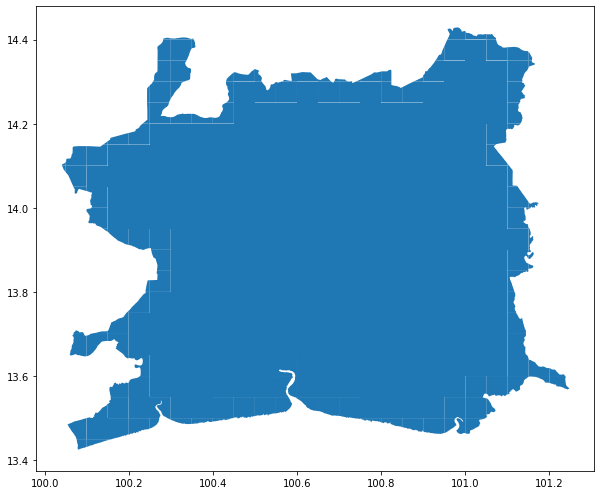

In [3]:
bangkok_grid_gdf.plot(figsize=(10,10))
plt.show()

In [4]:
venues_list = search_city_venues('Bangkok', bangkok_grid_gdf)

REQUESTED Bangkok 0 (100.041735, 14.084813, 100.05, 14.1)
REQUESTED Bangkok 1 (100.040946, 14.1, 100.05, 14.108973)
REQUESTED Bangkok 2 (100.075839, 13.424913, 100.1, 13.45)
FOUND 5
REQUESTED Bangkok 3 (100.054252, 13.45, 100.1, 13.5)
FOUND 40
REQUESTED Bangkok 4 (100.099363, 13.5, 100.1, 13.500197)
REQUESTED Bangkok 5 (100.060103, 13.64675, 100.1, 13.65)
FOUND 1
REQUESTED Bangkok 6 (100.059936, 13.65, 100.1, 13.7)
FOUND 25
REQUESTED Bangkok 7 (100.068664, 13.7, 100.093873, 13.708572)
FOUND 48
REQUESTED Bangkok 8 (100.099069, 13.991464, 100.1, 13.99597)
REQUESTED Bangkok 9 (100.068482, 14.033159, 100.1, 14.05)
FOUND 6
REQUESTED Bangkok 10 (100.05, 14.05, 100.1, 14.1)
FOUND 2
REQUESTED Bangkok 11 (100.05, 14.1, 100.1, 14.146571)
FOUND 1
REQUESTED Bangkok 12 (100.1, 13.431664, 100.15, 13.45)
FOUND 4
REQUESTED Bangkok 13 (100.1, 13.45, 100.15, 13.5)
FOUND 23
REQUESTED Bangkok 14 (100.1, 13.5, 100.15, 13.533719)
FOUND 16
REQUESTED Bangkok 15 (100.1, 13.647194, 100.107464, 13.65)
FOUND 0
RE

FOUND 2
REQUESTED Bangkok 1 (100.25, 13.5875, 100.2625, 13.6)
FOUND 3
REQUESTED Bangkok 2 (100.2625, 13.575000000000001, 100.275, 13.5875)
FOUND 36
REQUESTED Bangkok 3 (100.2625, 13.5875, 100.275, 13.6)
FOUND 19
REQUESTED Bangkok 2 (100.275, 13.55, 100.3, 13.575000000000001)
FOUND 50
0.024999999999991473
0.025000000000000355
int LINESTRING (100.2875 13.55, 100.275 13.55)
int POLYGON ((100.2875 13.55, 100.275 13.55, 100.275 13.5625, 100.2875 13.5625, 100.2875 13.55))
int POLYGON ((100.275 13.5625, 100.275 13.575, 100.2875 13.575, 100.2875 13.5625, 100.275 13.5625))
int LINESTRING (100.275 13.575, 100.2875 13.575)
int LINESTRING (100.3 13.55, 100.2875 13.55)
int POLYGON ((100.3 13.55, 100.2875 13.55, 100.2875 13.5625, 100.3 13.5625, 100.3 13.55))
int POLYGON ((100.2875 13.575, 100.3 13.575, 100.3 13.5625, 100.2875 13.5625, 100.2875 13.575))
int LINESTRING (100.2875 13.575, 100.3 13.575)
grid length 4
REQUESTED Bangkok 0 (100.275, 13.55, 100.28750000000001, 13.5625)
FOUND 15
REQUESTED Ban

FOUND 4
REQUESTED Bangkok 1 (100.30000000000001, 13.5625, 100.3125, 13.575000000000001)
FOUND 44
REQUESTED Bangkok 2 (100.3125, 13.55, 100.325, 13.5625)
FOUND 4
REQUESTED Bangkok 3 (100.3125, 13.5625, 100.325, 13.575000000000001)
FOUND 5
REQUESTED Bangkok 3 (100.30000000000001, 13.575000000000001, 100.325, 13.6)
FOUND 50
0.024999999999991473
0.02499999999999858
int POLYGON ((100.3125 13.575, 100.3 13.575, 100.3 13.5875, 100.3125 13.5875, 100.3125 13.575))
int POLYGON ((100.3 13.6, 100.3125 13.6, 100.3125 13.5875, 100.3 13.5875, 100.3 13.6))
int POLYGON ((100.325 13.5875, 100.325 13.575, 100.3125 13.575, 100.3125 13.5875, 100.325 13.5875))
int POLYGON ((100.3125 13.6, 100.325 13.6, 100.325 13.5875, 100.3125 13.5875, 100.3125 13.6))
grid length 4
REQUESTED Bangkok 0 (100.30000000000001, 13.575000000000001, 100.3125, 13.5875)
FOUND 23
REQUESTED Bangkok 1 (100.30000000000001, 13.5875, 100.3125, 13.6)
FOUND 8
REQUESTED Bangkok 2 (100.3125, 13.575000000000001, 100.325, 13.5875)
FOUND 37
REQU

FOUND 50
0.0062500000000085265
0.006249999999999645
int LINESTRING (100.325 13.75625, 100.325 13.759375)
int LINESTRING (100.325 13.759375, 100.325 13.7625)
int POINT (100.325 13.7625)
int POLYGON ((100.325 13.75625, 100.325 13.759375, 100.328125 13.759375, 100.328125 13.75625, 100.325 13.75625))
int POLYGON ((100.325 13.759375, 100.325 13.7625, 100.328125 13.7625, 100.328125 13.759375, 100.325 13.759375))
int LINESTRING (100.325 13.7625, 100.328125 13.7625)
int POLYGON ((100.33125 13.759375, 100.33125 13.75625, 100.328125 13.75625, 100.328125 13.759375, 100.33125 13.759375))
int POLYGON ((100.328125 13.7625, 100.33125 13.7625, 100.33125 13.759375, 100.328125 13.759375, 100.328125 13.7625))
int LINESTRING (100.328125 13.7625, 100.33125 13.7625)
int LINESTRING (100.33125 13.759375, 100.33125 13.75625)
int LINESTRING (100.33125 13.7625, 100.33125 13.759375)
int POINT (100.33125 13.7625)
grid length 4
REQUESTED Bangkok 0 (100.325, 13.756250000000001, 100.328125, 13.759375)
FOUND 1
REQUEST

FOUND 50
0.04999999999999716
0.049999999999998934
int LINESTRING (100.3 13.9, 100.3 13.9)
int POLYGON ((100.3 13.9, 100.3 13.9, 100.3 13.925, 100.3 13.925, 100.3 13.9))
int POLYGON ((100.3 13.925, 100.3 13.95, 100.3 13.95, 100.3 13.925, 100.3 13.925))
int LINESTRING (100.325 13.9, 100.3 13.9)
int POLYGON ((100.325 13.9, 100.3 13.9, 100.3 13.925, 100.325 13.925, 100.325 13.9))
int POLYGON ((100.3 13.95, 100.325 13.95, 100.325 13.925, 100.3 13.925, 100.3 13.95))
int LINESTRING (100.35 13.9, 100.325 13.9)
int POLYGON ((100.35 13.9, 100.325 13.9, 100.325 13.925, 100.35 13.925, 100.35 13.9))
int POLYGON ((100.325 13.95, 100.35 13.95, 100.35 13.925, 100.325 13.925, 100.325 13.95))
grid length 6
REQUESTED Bangkok 0 (100.3, 13.9, 100.30000000000001, 13.925)
REQUESTED Bangkok 1 (100.3, 13.925, 100.30000000000001, 13.95)
REQUESTED Bangkok 2 (100.30000000000001, 13.9, 100.325, 13.925)
FOUND 12
REQUESTED Bangkok 3 (100.30000000000001, 13.925, 100.325, 13.95)
FOUND 1
REQUESTED Bangkok 4 (100.325, 1

FOUND 7
REQUESTED Bangkok 1 (100.36250000000001, 13.5953125, 100.3640625, 13.596875)
FOUND 9
REQUESTED Bangkok 2 (100.3640625, 13.59375, 100.36562500000001, 13.5953125)
FOUND 13
REQUESTED Bangkok 3 (100.3640625, 13.5953125, 100.36562500000001, 13.596875)
FOUND 31
REQUESTED Bangkok 1 (100.36250000000001, 13.596875, 100.36562500000001, 13.6)
FOUND 4
REQUESTED Bangkok 2 (100.36562500000001, 13.59375, 100.36875, 13.596875)
FOUND 32
REQUESTED Bangkok 3 (100.36562500000001, 13.596875, 100.36875, 13.6)
FOUND 12
REQUESTED Bangkok 2 (100.36875, 13.5875, 100.375, 13.59375)
REQUESTED Bangkok 3 (100.36875, 13.59375, 100.375, 13.6)
FOUND 5
REQUESTED Bangkok 4 (100.375, 13.55, 100.4, 13.575000000000001)
REQUESTED Bangkok 5 (100.375, 13.575000000000001, 100.4, 13.6)
FOUND 14
REQUESTED Bangkok 98 (100.35, 13.6, 100.4, 13.65)
FOUND 29
REQUESTED Bangkok 99 (100.35, 13.65, 100.4, 13.7)
FOUND 37
REQUESTED Bangkok 100 (100.35, 13.7, 100.4, 13.75)
FOUND 50
0.05000000000001137
0.05000000000000071
int POLYGON

FOUND 30
REQUESTED Bangkok 1 (100.39375000000001, 13.7453125, 100.3953125, 13.746875000000001)
FOUND 7
REQUESTED Bangkok 2 (100.3953125, 13.74375, 100.39687500000001, 13.7453125)
FOUND 26
REQUESTED Bangkok 3 (100.3953125, 13.7453125, 100.39687500000001, 13.746875000000001)
FOUND 8
REQUESTED Bangkok 1 (100.39375000000001, 13.746875000000001, 100.39687500000001, 13.75)
FOUND 9
REQUESTED Bangkok 2 (100.39687500000001, 13.74375, 100.4, 13.746875000000001)
FOUND 6
REQUESTED Bangkok 3 (100.39687500000001, 13.746875000000001, 100.4, 13.75)
FOUND 6
REQUESTED Bangkok 101 (100.35, 13.75, 100.4, 13.8)
FOUND 50
0.05000000000001137
0.05000000000000071
int LINESTRING (100.35 13.75, 100.35 13.75)
int POLYGON ((100.35 13.75, 100.35 13.75, 100.35 13.775, 100.35 13.775, 100.35 13.75))
int POLYGON ((100.35 13.775, 100.35 13.8, 100.35 13.8, 100.35 13.775, 100.35 13.775))
int LINESTRING (100.375 13.75, 100.35 13.75)
int POLYGON ((100.375 13.75, 100.35 13.75, 100.35 13.775, 100.375 13.775, 100.375 13.75))
i

FOUND 16
REQUESTED Bangkok 1 (100.375, 13.8125, 100.3875, 13.825000000000001)
FOUND 12
REQUESTED Bangkok 2 (100.3875, 13.8, 100.4, 13.8125)
FOUND 22
REQUESTED Bangkok 3 (100.3875, 13.8125, 100.4, 13.825000000000001)
FOUND 50
0.012500000000002842
0.012500000000001066
int POINT (100.3875 13.8125)
int LINESTRING (100.3875 13.8125, 100.3875 13.81875)
int LINESTRING (100.3875 13.81875, 100.3875 13.825)
int POINT (100.3875 13.825)
int LINESTRING (100.39375 13.8125, 100.3875 13.8125)
int POLYGON ((100.39375 13.8125, 100.3875 13.8125, 100.3875 13.81875, 100.39375 13.81875, 100.39375 13.8125))
int POLYGON ((100.3875 13.825, 100.39375 13.825, 100.39375 13.81875, 100.3875 13.81875, 100.3875 13.825))
int LINESTRING (100.3875 13.825, 100.39375 13.825)
int LINESTRING (100.4 13.8125, 100.39375 13.8125)
int POLYGON ((100.4 13.81875, 100.4 13.8125, 100.39375 13.8125, 100.39375 13.81875, 100.4 13.81875))
int POLYGON ((100.39375 13.825, 100.4 13.825, 100.4 13.81875, 100.39375 13.81875, 100.39375 13.825))

FOUND 13
REQUESTED Bangkok 104 (100.35, 13.9, 100.4, 13.95)
FOUND 16
REQUESTED Bangkok 105 (100.35, 13.95, 100.4, 14.0)
FOUND 50
0.05000000000001137
0.05000000000000071
int POLYGON ((100.35 13.95, 100.35 13.95, 100.35 13.95, 100.35 13.95, 100.35 13.95))
int POLYGON ((100.35 13.95, 100.35 13.975, 100.35 13.975, 100.35 13.95, 100.35 13.95))
int POLYGON ((100.35 13.975, 100.35 14, 100.35 14, 100.35 13.975, 100.35 13.975))
int POLYGON ((100.375 13.95, 100.35 13.95, 100.35 13.95, 100.375 13.95, 100.375 13.95))
int POLYGON ((100.375 13.95, 100.35 13.95, 100.35 13.975, 100.375 13.975, 100.375 13.95))
int POLYGON ((100.35 14, 100.375 14, 100.375 13.975, 100.35 13.975, 100.35 14))
int POLYGON ((100.4 13.95, 100.375 13.95, 100.375 13.95, 100.4 13.95, 100.4 13.95))
int POLYGON ((100.4 13.975, 100.4 13.95, 100.375 13.95, 100.375 13.975, 100.4 13.975))
int POLYGON ((100.375 14, 100.4 14, 100.4 13.975, 100.375 13.975, 100.375 14))
int LINESTRING (100.4 13.95, 100.4 13.95)
int LINESTRING (100.4 13.97

FOUND 39
REQUESTED Bangkok 1 (100.42500000000001, 13.584375000000001, 100.42812500000001, 13.5875)
FOUND 4
REQUESTED Bangkok 2 (100.42812500000001, 13.58125, 100.43125, 13.584375000000001)
REQUESTED Bangkok 3 (100.42812500000001, 13.584375000000001, 100.43125, 13.5875)
FOUND 11
REQUESTED Bangkok 2 (100.43125, 13.575000000000001, 100.4375, 13.58125)
FOUND 1
REQUESTED Bangkok 3 (100.43125, 13.58125, 100.4375, 13.5875)
REQUESTED Bangkok 1 (100.42500000000001, 13.5875, 100.4375, 13.6)
FOUND 13
REQUESTED Bangkok 2 (100.4375, 13.575000000000001, 100.45, 13.5875)
FOUND 15
REQUESTED Bangkok 3 (100.4375, 13.5875, 100.45, 13.6)
FOUND 1
REQUESTED Bangkok 116 (100.4, 13.6, 100.45, 13.65)
FOUND 27
REQUESTED Bangkok 117 (100.4, 13.65, 100.45, 13.7)
FOUND 50
0.04999999999999716
0.049999999999998934
int LINESTRING (100.425 13.65, 100.4 13.65)
int POLYGON ((100.425 13.65, 100.4 13.65, 100.4 13.675, 100.425 13.675, 100.425 13.65))
int POLYGON ((100.4 13.675, 100.4 13.7, 100.425 13.7, 100.425 13.675, 100

FOUND 1
REQUESTED Bangkok 1 (100.41250000000001, 13.709375000000001, 100.415625, 13.7125)
FOUND 24
REQUESTED Bangkok 2 (100.415625, 13.70625, 100.41875, 13.709375000000001)
FOUND 2
REQUESTED Bangkok 3 (100.415625, 13.709375000000001, 100.41875, 13.7125)
FOUND 46
REQUESTED Bangkok 2 (100.41875, 13.700000000000001, 100.42500000000001, 13.70625)
FOUND 50
0.0062500000000085265
0.006249999999999645
int LINESTRING (100.41875 13.7, 100.41875 13.703125)
int LINESTRING (100.41875 13.703125, 100.41875 13.70625)
int POLYGON ((100.421875 13.7, 100.41875 13.7, 100.41875 13.703125, 100.421875 13.703125, 100.421875 13.7))
int POLYGON ((100.41875 13.703125, 100.41875 13.70625, 100.421875 13.70625, 100.421875 13.703125, 100.41875 13.703125))
int POLYGON ((100.425 13.703125, 100.425 13.7, 100.421875 13.7, 100.421875 13.703125, 100.425 13.703125))
int POLYGON ((100.425 13.70625, 100.425 13.703125, 100.421875 13.703125, 100.421875 13.70625, 100.425 13.70625))
int LINESTRING (100.425 13.703125, 100.425 13.

FOUND 50
0.0062500000000085265
0.006249999999999645
int POINT (100.4375 13.7125)
int LINESTRING (100.4375 13.7125, 100.4375 13.715625)
int LINESTRING (100.4375 13.715625, 100.4375 13.71875)
int LINESTRING (100.440625 13.7125, 100.4375 13.7125)
int POLYGON ((100.440625 13.7125, 100.4375 13.7125, 100.4375 13.715625, 100.440625 13.715625, 100.440625 13.7125))
int POLYGON ((100.4375 13.715625, 100.4375 13.71875, 100.440625 13.71875, 100.440625 13.715625, 100.4375 13.715625))
int LINESTRING (100.44375 13.7125, 100.440625 13.7125)
int POLYGON ((100.44375 13.7125, 100.440625 13.7125, 100.440625 13.715625, 100.44375 13.715625, 100.44375 13.7125))
int POLYGON ((100.440625 13.71875, 100.44375 13.71875, 100.44375 13.715625, 100.440625 13.715625, 100.440625 13.71875))
int POINT (100.44375 13.7125)
int LINESTRING (100.44375 13.715625, 100.44375 13.7125)
int LINESTRING (100.44375 13.71875, 100.44375 13.715625)
grid length 4
REQUESTED Bangkok 0 (100.4375, 13.7125, 100.44062500000001, 13.7156250000000

FOUND 10
REQUESTED Bangkok 1 (100.42500000000001, 13.762500000000001, 100.4375, 13.775)
FOUND 50
0.012499999999988631
0.01249999999999929
int POLYGON ((100.425 13.7625, 100.425 13.76875, 100.43125 13.76875, 100.43125 13.7625, 100.425 13.7625))
int POLYGON ((100.425 13.76875, 100.425 13.775, 100.43125 13.775, 100.43125 13.76875, 100.425 13.76875))
int POLYGON ((100.4375 13.76875, 100.4375 13.7625, 100.43125 13.7625, 100.43125 13.76875, 100.4375 13.76875))
int POLYGON ((100.43125 13.775, 100.4375 13.775, 100.4375 13.76875, 100.43125 13.76875, 100.43125 13.775))
grid length 4
REQUESTED Bangkok 0 (100.42500000000001, 13.762500000000001, 100.43125, 13.76875)
FOUND 50
0.006249999999994316
0.006249999999999645
int POLYGON ((100.425 13.7625, 100.425 13.765625, 100.428125 13.765625, 100.428125 13.7625, 100.425 13.7625))
int POLYGON ((100.425 13.765625, 100.425 13.76875, 100.428125 13.76875, 100.428125 13.765625, 100.425 13.765625))
int POLYGON ((100.43125 13.765625, 100.43125 13.7625, 100.42812

FOUND 50
0.012500000000002842
0.01249999999999929
int LINESTRING (100.4375 13.7875, 100.4375 13.79375)
int LINESTRING (100.4375 13.79375, 100.4375 13.8)
int POLYGON ((100.44375 13.7875, 100.4375 13.7875, 100.4375 13.79375, 100.44375 13.79375, 100.44375 13.7875))
int POLYGON ((100.4375 13.8, 100.44375 13.8, 100.44375 13.79375, 100.4375 13.79375, 100.4375 13.8))
int POLYGON ((100.45 13.79375, 100.45 13.7875, 100.44375 13.7875, 100.44375 13.79375, 100.45 13.79375))
int POLYGON ((100.44375 13.8, 100.45 13.8, 100.45 13.79375, 100.44375 13.79375, 100.44375 13.8))
grid length 4
REQUESTED Bangkok 0 (100.4375, 13.787500000000001, 100.44375000000001, 13.793750000000001)
FOUND 4
REQUESTED Bangkok 1 (100.4375, 13.793750000000001, 100.44375000000001, 13.8)
FOUND 32
REQUESTED Bangkok 2 (100.44375000000001, 13.787500000000001, 100.45, 13.793750000000001)
FOUND 50
0.006249999999994316
0.006249999999999645
int POLYGON ((100.446875 13.7875, 100.44375 13.7875, 100.44375 13.790625, 100.446875 13.790625, 1

FOUND 32
REQUESTED Bangkok 1 (100.434375, 13.8234375, 100.43593750000001, 13.825000000000001)
FOUND 50
0.0015625000000056843
0.0015625000000003553
int POINT (100.434375 13.8234375)
int LINESTRING (100.434375 13.8234375, 100.434375 13.82421875)
int LINESTRING (100.434375 13.82421875, 100.434375 13.825)
int POINT (100.434375 13.825)
int LINESTRING (100.43515625 13.8234375, 100.434375 13.8234375)
int POLYGON ((100.43515625 13.8234375, 100.434375 13.8234375, 100.434375 13.82421875, 100.43515625 13.82421875, 100.43515625 13.8234375))
int POLYGON ((100.434375 13.825, 100.43515625 13.825, 100.43515625 13.82421875, 100.434375 13.82421875, 100.434375 13.825))
int LINESTRING (100.434375 13.825, 100.43515625 13.825)
int LINESTRING (100.4359375 13.8234375, 100.43515625 13.8234375)
int POLYGON ((100.4359375 13.82421875, 100.4359375 13.8234375, 100.43515625 13.8234375, 100.43515625 13.82421875, 100.4359375 13.82421875))
int POLYGON ((100.43515625 13.825, 100.4359375 13.825, 100.4359375 13.82421875, 

FOUND 14
REQUESTED Bangkok 1 (100.4, 13.881250000000001, 100.40625, 13.887500000000001)
FOUND 37
REQUESTED Bangkok 2 (100.40625, 13.875, 100.41250000000001, 13.881250000000001)
FOUND 50
0.0062500000000085265
0.006250000000001421
int POINT (100.40625 13.875)
int LINESTRING (100.40625 13.875, 100.40625 13.878125)
int LINESTRING (100.40625 13.878125, 100.40625 13.88125)
int POINT (100.40625 13.88125)
int LINESTRING (100.409375 13.875, 100.40625 13.875)
int POLYGON ((100.409375 13.875, 100.40625 13.875, 100.40625 13.878125, 100.409375 13.878125, 100.409375 13.875))
int POLYGON ((100.40625 13.878125, 100.40625 13.88125, 100.409375 13.88125, 100.409375 13.878125, 100.40625 13.878125))
int LINESTRING (100.40625 13.88125, 100.409375 13.88125)
int LINESTRING (100.4125 13.875, 100.409375 13.875)
int POLYGON ((100.4125 13.878125, 100.4125 13.875, 100.409375 13.875, 100.409375 13.878125, 100.4125 13.878125))
int POLYGON ((100.4125 13.88125, 100.4125 13.878125, 100.409375 13.878125, 100.409375 13.8

FOUND 13
REQUESTED Bangkok 1 (100.40937500000001, 13.8828125, 100.4109375, 13.884375)
FOUND 25
REQUESTED Bangkok 2 (100.4109375, 13.881250000000001, 100.41250000000001, 13.8828125)
FOUND 11
REQUESTED Bangkok 3 (100.4109375, 13.8828125, 100.41250000000001, 13.884375)
FOUND 2
REQUESTED Bangkok 3 (100.40937500000001, 13.884375, 100.41250000000001, 13.887500000000001)
FOUND 9
REQUESTED Bangkok 1 (100.4, 13.887500000000001, 100.41250000000001, 13.9)
FOUND 50
0.012500000000002842
0.01249999999999929
int POLYGON ((100.4 13.8875, 100.4 13.89375, 100.40625 13.89375, 100.40625 13.8875, 100.4 13.8875))
int POLYGON ((100.4 13.89375, 100.4 13.9, 100.40625 13.9, 100.40625 13.89375, 100.4 13.89375))
int POLYGON ((100.4125 13.89375, 100.4125 13.8875, 100.40625 13.8875, 100.40625 13.89375, 100.4125 13.89375))
int POLYGON ((100.40625 13.9, 100.4125 13.9, 100.4125 13.89375, 100.40625 13.89375, 100.40625 13.9))
int LINESTRING (100.4125 13.89375, 100.4125 13.8875)
int LINESTRING (100.4125 13.9, 100.4125 13

FOUND 19
REQUESTED Bangkok 125 (100.4, 14.05, 100.45, 14.1)
FOUND 32
REQUESTED Bangkok 126 (100.4, 14.1, 100.45, 14.15)
FOUND 4
REQUESTED Bangkok 127 (100.4, 14.15, 100.45, 14.2)
FOUND 5
REQUESTED Bangkok 128 (100.4, 14.2, 100.45, 14.25)
FOUND 0
REQUESTED Bangkok 129 (100.431, 14.25, 100.45, 14.3)
FOUND 5
REQUESTED Bangkok 130 (100.431043, 14.3, 100.45, 14.321507)
FOUND 0
REQUESTED Bangkok 131 (100.458612, 13.498889, 100.462218, 13.5)
REQUESTED Bangkok 132 (100.45, 13.5, 100.5, 13.55)
FOUND 3
REQUESTED Bangkok 133 (100.45, 13.55, 100.5, 13.6)
FOUND 34
REQUESTED Bangkok 134 (100.45, 13.6, 100.5, 13.65)
FOUND 26
REQUESTED Bangkok 135 (100.45, 13.65, 100.5, 13.7)
FOUND 50
0.04999999999999716
0.049999999999998934
int POINT (100.45 13.65)
int LINESTRING (100.45 13.65, 100.45 13.675)
int LINESTRING (100.45 13.675, 100.45 13.7)
int LINESTRING (100.475 13.65, 100.45 13.65)
int POLYGON ((100.475 13.65, 100.45 13.65, 100.45 13.675, 100.475 13.675, 100.475 13.65))
int POLYGON ((100.45 13.675, 100

FOUND 21
REQUESTED Bangkok 1 (100.45, 13.76875, 100.45625000000001, 13.775)
FOUND 24
REQUESTED Bangkok 2 (100.45625000000001, 13.762500000000001, 100.4625, 13.76875)
FOUND 4
REQUESTED Bangkok 3 (100.45625000000001, 13.76875, 100.4625, 13.775)
FOUND 5
REQUESTED Bangkok 2 (100.4625, 13.75, 100.47500000000001, 13.762500000000001)
FOUND 21
REQUESTED Bangkok 3 (100.4625, 13.762500000000001, 100.47500000000001, 13.775)
FOUND 32
REQUESTED Bangkok 1 (100.45, 13.775, 100.47500000000001, 13.8)
FOUND 21
REQUESTED Bangkok 2 (100.47500000000001, 13.75, 100.5, 13.775)
FOUND 50
0.024999999999991473
0.025000000000000355
int LINESTRING (100.4875 13.75, 100.475 13.75)
int POLYGON ((100.4875 13.75, 100.475 13.75, 100.475 13.7625, 100.4875 13.7625, 100.4875 13.75))
int POLYGON ((100.475 13.7625, 100.475 13.775, 100.4875 13.775, 100.4875 13.7625, 100.475 13.7625))
int LINESTRING (100.5 13.75, 100.4875 13.75)
int POLYGON ((100.5 13.75, 100.4875 13.75, 100.4875 13.7625, 100.5 13.7625, 100.5 13.75))
int POLYG

FOUND 50
0.003124999999997158
0.003124999999998934
int POLYGON ((100.4953125 13.75625, 100.49375 13.75625, 100.49375 13.7578125, 100.4953125 13.7578125, 100.4953125 13.75625))
int POLYGON ((100.49375 13.7578125, 100.49375 13.759375, 100.4953125 13.759375, 100.4953125 13.7578125, 100.49375 13.7578125))
int POLYGON ((100.496875 13.75625, 100.4953125 13.75625, 100.4953125 13.7578125, 100.496875 13.7578125, 100.496875 13.75625))
int POLYGON ((100.4953125 13.759375, 100.496875 13.759375, 100.496875 13.7578125, 100.4953125 13.7578125, 100.4953125 13.759375))
grid length 4
REQUESTED Bangkok 0 (100.49375, 13.756250000000001, 100.49531250000001, 13.7578125)
FOUND 12
REQUESTED Bangkok 1 (100.49375, 13.7578125, 100.49531250000001, 13.759375)
FOUND 17
REQUESTED Bangkok 2 (100.49531250000001, 13.756250000000001, 100.496875, 13.7578125)
FOUND 8
REQUESTED Bangkok 3 (100.49531250000001, 13.7578125, 100.496875, 13.759375)
FOUND 32
REQUESTED Bangkok 1 (100.49375, 13.759375, 100.496875, 13.76250000000000

FOUND 11
REQUESTED Bangkok 1 (100.478125, 13.7765625, 100.47968750000001, 13.778125000000001)
FOUND 49
REQUESTED Bangkok 2 (100.47968750000001, 13.775, 100.48125, 13.7765625)
FOUND 21
REQUESTED Bangkok 3 (100.47968750000001, 13.7765625, 100.48125, 13.778125000000001)
FOUND 3
REQUESTED Bangkok 3 (100.478125, 13.778125000000001, 100.48125, 13.78125)
FOUND 4
REQUESTED Bangkok 1 (100.47500000000001, 13.78125, 100.48125, 13.787500000000001)
FOUND 33
REQUESTED Bangkok 2 (100.48125, 13.775, 100.48750000000001, 13.78125)
FOUND 50
0.0062500000000085265
0.006249999999999645
int POINT (100.48125 13.775)
int LINESTRING (100.48125 13.775, 100.48125 13.778125)
int LINESTRING (100.48125 13.778125, 100.48125 13.78125)
int LINESTRING (100.484375 13.775, 100.48125 13.775)
int POLYGON ((100.484375 13.775, 100.48125 13.775, 100.48125 13.778125, 100.484375 13.778125, 100.484375 13.775))
int POLYGON ((100.48125 13.778125, 100.48125 13.78125, 100.484375 13.78125, 100.484375 13.778125, 100.48125 13.778125))
i

FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.4890625 13.78125, 100.4875 13.78125)
int POLYGON ((100.4875 13.78125, 100.4875 13.7828125, 100.4890625 13.7828125, 100.4890625 13.78125, 100.4875 13.78125))
int POLYGON ((100.4875 13.7828125, 100.4875 13.784375, 100.4890625 13.784375, 100.4890625 13.7828125, 100.4875 13.7828125))
int LINESTRING (100.490625 13.78125, 100.4890625 13.78125)
int POLYGON ((100.490625 13.7828125, 100.490625 13.78125, 100.4890625 13.78125, 100.4890625 13.7828125, 100.490625 13.7828125))
int POLYGON ((100.4890625 13.784375, 100.490625 13.784375, 100.490625 13.7828125, 100.4890625 13.7828125, 100.4890625 13.784375))
int POINT (100.490625 13.78125)
int LINESTRING (100.490625 13.7828125, 100.490625 13.78125)
int LINESTRING (100.490625 13.784375, 100.490625 13.7828125)
grid length 4
REQUESTED Bangkok 0 (100.48750000000001, 13.78125, 100.4890625, 13.7828125)
FOUND 7
REQUESTED Bangkok 1 (100.48750000000001, 13.7828125, 100.4890625, 13.784375)
FO

REQUESTED Bangkok 1 (100.45, 13.850000000000001, 100.47500000000001, 13.875)
FOUND 16
REQUESTED Bangkok 2 (100.45, 13.875, 100.47500000000001, 13.9)
FOUND 22
REQUESTED Bangkok 3 (100.47500000000001, 13.85, 100.5, 13.850000000000001)
REQUESTED Bangkok 4 (100.47500000000001, 13.850000000000001, 100.5, 13.875)
FOUND 50
0.024999999999991473
0.02499999999999858
int POLYGON ((100.4875 13.85, 100.475 13.85, 100.475 13.8625, 100.4875 13.8625, 100.4875 13.85))
int POLYGON ((100.475 13.8625, 100.475 13.875, 100.4875 13.875, 100.4875 13.8625, 100.475 13.8625))
int POLYGON ((100.5 13.8625, 100.5 13.85, 100.4875 13.85, 100.4875 13.8625, 100.5 13.8625))
int POLYGON ((100.5 13.875, 100.5 13.8625, 100.4875 13.8625, 100.4875 13.875, 100.5 13.875))
grid length 4
REQUESTED Bangkok 0 (100.47500000000001, 13.850000000000001, 100.48750000000001, 13.8625)
FOUND 42
REQUESTED Bangkok 1 (100.47500000000001, 13.8625, 100.48750000000001, 13.875)
FOUND 50
0.012500000000002842
0.01249999999999929
int LINESTRING (10

FOUND 4
REQUESTED Bangkok 3 (100.48750000000001, 13.8625, 100.5, 13.875)
FOUND 42
REQUESTED Bangkok 5 (100.47500000000001, 13.875, 100.5, 13.9)
FOUND 33
REQUESTED Bangkok 140 (100.45, 13.9, 100.5, 13.95)
FOUND 50
0.04999999999999716
0.049999999999998934
int POINT (100.45 13.9)
int LINESTRING (100.45 13.9, 100.45 13.925)
int LINESTRING (100.45 13.925, 100.45 13.95)
int LINESTRING (100.475 13.9, 100.45 13.9)
int POLYGON ((100.475 13.9, 100.45 13.9, 100.45 13.925, 100.475 13.925, 100.475 13.9))
int POLYGON ((100.45 13.925, 100.45 13.95, 100.475 13.95, 100.475 13.925, 100.45 13.925))
int LINESTRING (100.5 13.9, 100.475 13.9)
int POLYGON ((100.5 13.9, 100.475 13.9, 100.475 13.925, 100.5 13.925, 100.5 13.9))
int POLYGON ((100.475 13.95, 100.5 13.95, 100.5 13.925, 100.475 13.925, 100.475 13.95))
grid length 4
REQUESTED Bangkok 0 (100.45, 13.9, 100.47500000000001, 13.925)
FOUND 31
REQUESTED Bangkok 1 (100.45, 13.925, 100.47500000000001, 13.95)
FOUND 8
REQUESTED Bangkok 2 (100.47500000000001, 1

REQUESTED Bangkok 5 (100.525, 13.625, 100.55, 13.65)
FOUND 50
0.024999999999991473
0.025000000000000355
int LINESTRING (100.5375 13.625, 100.525 13.625)
int POLYGON ((100.5375 13.625, 100.525 13.625, 100.525 13.6375, 100.5375 13.6375, 100.5375 13.625))
int POLYGON ((100.525 13.65, 100.5375 13.65, 100.5375 13.6375, 100.525 13.6375, 100.525 13.65))
int LINESTRING (100.55 13.625, 100.5375 13.625)
int POLYGON ((100.55 13.6375, 100.55 13.625, 100.5375 13.625, 100.5375 13.6375, 100.55 13.6375))
int POLYGON ((100.5375 13.65, 100.55 13.65, 100.55 13.6375, 100.5375 13.6375, 100.5375 13.65))
grid length 4
REQUESTED Bangkok 0 (100.525, 13.625, 100.53750000000001, 13.637500000000001)
FOUND 50
0.012500000000002842
0.012500000000001066
int LINESTRING (100.53125 13.625, 100.525 13.625)
int POLYGON ((100.53125 13.625, 100.525 13.625, 100.525 13.63125, 100.53125 13.63125, 100.53125 13.625))
int POLYGON ((100.525 13.63125, 100.525 13.6375, 100.53125 13.6375, 100.53125 13.63125, 100.525 13.63125))
int LI

FOUND 7
REQUESTED Bangkok 3 (100.515625, 13.696875, 100.51875000000001, 13.7)
FOUND 22
REQUESTED Bangkok 2 (100.51875000000001, 13.6875, 100.525, 13.693750000000001)
FOUND 49
REQUESTED Bangkok 3 (100.51875000000001, 13.693750000000001, 100.525, 13.7)
FOUND 23
REQUESTED Bangkok 2 (100.525, 13.65, 100.55, 13.675)
FOUND 28
REQUESTED Bangkok 3 (100.525, 13.675, 100.55, 13.7)
FOUND 50
0.024999999999991473
0.02499999999999858
int LINESTRING (100.5375 13.675, 100.525 13.675)
int POLYGON ((100.5375 13.675, 100.525 13.675, 100.525 13.6875, 100.5375 13.6875, 100.5375 13.675))
int POLYGON ((100.525 13.7, 100.5375 13.7, 100.5375 13.6875, 100.525 13.6875, 100.525 13.7))
int LINESTRING (100.55 13.675, 100.5375 13.675)
int POLYGON ((100.55 13.6875, 100.55 13.675, 100.5375 13.675, 100.5375 13.6875, 100.55 13.6875))
int POLYGON ((100.5375 13.7, 100.55 13.7, 100.55 13.6875, 100.5375 13.6875, 100.5375 13.7))
grid length 4
REQUESTED Bangkok 0 (100.525, 13.675, 100.53750000000001, 13.6875)
FOUND 50
0.01250

FOUND 50
0.006249999999994316
0.006250000000001421
int LINESTRING (100.540625 13.6875, 100.5375 13.6875)
int POLYGON ((100.540625 13.6875, 100.5375 13.6875, 100.5375 13.690625, 100.540625 13.690625, 100.540625 13.6875))
int POLYGON ((100.5375 13.690625, 100.5375 13.69375, 100.540625 13.69375, 100.540625 13.690625, 100.5375 13.690625))
int LINESTRING (100.5375 13.69375, 100.540625 13.69375)
int LINESTRING (100.54375 13.6875, 100.540625 13.6875)
int POLYGON ((100.54375 13.6875, 100.540625 13.6875, 100.540625 13.690625, 100.54375 13.690625, 100.54375 13.6875))
int POLYGON ((100.540625 13.69375, 100.54375 13.69375, 100.54375 13.690625, 100.540625 13.690625, 100.540625 13.69375))
int LINESTRING (100.540625 13.69375, 100.54375 13.69375)
grid length 4
REQUESTED Bangkok 0 (100.53750000000001, 13.6875, 100.540625, 13.690625)
FOUND 6
REQUESTED Bangkok 1 (100.53750000000001, 13.690625, 100.540625, 13.693750000000001)
FOUND 42
REQUESTED Bangkok 2 (100.540625, 13.6875, 100.54375, 13.690625)
REQUEST

FOUND 30
REQUESTED Bangkok 1 (100.54375, 13.696875, 100.546875, 13.7)
FOUND 30
REQUESTED Bangkok 2 (100.546875, 13.693750000000001, 100.55, 13.696875)
FOUND 4
REQUESTED Bangkok 3 (100.546875, 13.696875, 100.55, 13.7)
FOUND 5
REQUESTED Bangkok 153 (100.5, 13.7, 100.55, 13.75)
FOUND 50
0.04999999999999716
0.05000000000000071
int LINESTRING (100.5 13.7, 100.5 13.7)
int LINESTRING (100.5 13.7, 100.5 13.725)
int LINESTRING (100.5 13.725, 100.5 13.75)
int POLYGON ((100.525 13.7, 100.5 13.7, 100.5 13.7, 100.525 13.7, 100.525 13.7))
int POLYGON ((100.5 13.7, 100.5 13.725, 100.525 13.725, 100.525 13.7, 100.5 13.7))
int POLYGON ((100.5 13.725, 100.5 13.75, 100.525 13.75, 100.525 13.725, 100.5 13.725))
int POLYGON ((100.55 13.7, 100.525 13.7, 100.525 13.7, 100.55 13.7, 100.55 13.7))
int POLYGON ((100.55 13.725, 100.55 13.7, 100.525 13.7, 100.525 13.725, 100.55 13.725))
int POLYGON ((100.525 13.75, 100.55 13.75, 100.55 13.725, 100.525 13.725, 100.525 13.75))
grid length 6
REQUESTED Bangkok 0 (100.

FOUND 50
0.0015625000000056843
0.0015625000000003553
int POINT (100.515625 13.71875)
int LINESTRING (100.515625 13.71875, 100.515625 13.71953125)
int LINESTRING (100.515625 13.71953125, 100.515625 13.7203125)
int LINESTRING (100.51640625 13.71875, 100.515625 13.71875)
int POLYGON ((100.51640625 13.71875, 100.515625 13.71875, 100.515625 13.71953125, 100.51640625 13.71953125, 100.51640625 13.71875))
int POLYGON ((100.515625 13.71953125, 100.515625 13.7203125, 100.51640625 13.7203125, 100.51640625 13.71953125, 100.515625 13.71953125))
int LINESTRING (100.5171875 13.71875, 100.51640625 13.71875)
int POLYGON ((100.5171875 13.71875, 100.51640625 13.71875, 100.51640625 13.71953125, 100.5171875 13.71953125, 100.5171875 13.71875))
int POLYGON ((100.51640625 13.7203125, 100.5171875 13.7203125, 100.5171875 13.71953125, 100.51640625 13.71953125, 100.51640625 13.7203125))
int POINT (100.5171875 13.71875)
int LINESTRING (100.5171875 13.71953125, 100.5171875 13.71875)
int LINESTRING (100.5171875 13.7

FOUND 6
REQUESTED Bangkok 1 (100.515625, 13.72265625, 100.51640625, 13.723437500000001)
FOUND 8
REQUESTED Bangkok 2 (100.51640625, 13.721875, 100.5171875, 13.72265625)
FOUND 33
REQUESTED Bangkok 3 (100.51640625, 13.72265625, 100.5171875, 13.723437500000001)
FOUND 32
REQUESTED Bangkok 1 (100.515625, 13.723437500000001, 100.5171875, 13.725000000000001)
FOUND 25
REQUESTED Bangkok 2 (100.5171875, 13.721875, 100.51875000000001, 13.723437500000001)
FOUND 50
0.0015625000000056843
0.0015625000000003553
int LINESTRING (100.51796875 13.721875, 100.5171875 13.721875)
int POLYGON ((100.51796875 13.721875, 100.5171875 13.721875, 100.5171875 13.72265625, 100.51796875 13.72265625, 100.51796875 13.721875))
int POLYGON ((100.5171875 13.72265625, 100.5171875 13.7234375, 100.51796875 13.7234375, 100.51796875 13.72265625, 100.5171875 13.72265625))
int LINESTRING (100.5171875 13.7234375, 100.51796875 13.7234375)
int LINESTRING (100.51875 13.721875, 100.51796875 13.721875)
int POLYGON ((100.51875 13.7226562

FOUND 50
0.025000000000005684
0.02499999999999858
int LINESTRING (100.5 13.725, 100.5 13.7375)
int LINESTRING (100.5 13.7375, 100.5 13.75)
int POLYGON ((100.5 13.725, 100.5 13.7375, 100.5125 13.7375, 100.5125 13.725, 100.5 13.725))
int POLYGON ((100.5 13.7375, 100.5 13.75, 100.5125 13.75, 100.5125 13.7375, 100.5 13.7375))
int POLYGON ((100.525 13.7375, 100.525 13.725, 100.5125 13.725, 100.5125 13.7375, 100.525 13.7375))
int POLYGON ((100.5125 13.75, 100.525 13.75, 100.525 13.7375, 100.5125 13.7375, 100.5125 13.75))
int LINESTRING (100.525 13.7375, 100.525 13.725)
int LINESTRING (100.525 13.75, 100.525 13.7375)
grid length 4
REQUESTED Bangkok 0 (100.5, 13.725000000000001, 100.5125, 13.7375)
FOUND 50
0.012500000000002842
0.01249999999999929
int LINESTRING (100.5 13.725, 100.5 13.73125)
int LINESTRING (100.5 13.73125, 100.5 13.7375)
int POLYGON ((100.5 13.725, 100.5 13.73125, 100.50625 13.73125, 100.50625 13.725, 100.5 13.725))
int POLYGON ((100.5 13.73125, 100.5 13.7375, 100.50625 13.737

FOUND 11
REQUESTED Bangkok 1 (100.50625000000001, 13.728125, 100.509375, 13.731250000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.5078125 13.728125, 100.50625 13.728125)
int POLYGON ((100.50625 13.728125, 100.50625 13.7296875, 100.5078125 13.7296875, 100.5078125 13.728125, 100.50625 13.728125))
int POLYGON ((100.50625 13.7296875, 100.50625 13.73125, 100.5078125 13.73125, 100.5078125 13.7296875, 100.50625 13.7296875))
int LINESTRING (100.50625 13.73125, 100.5078125 13.73125)
int LINESTRING (100.509375 13.728125, 100.5078125 13.728125)
int POLYGON ((100.509375 13.7296875, 100.509375 13.728125, 100.5078125 13.728125, 100.5078125 13.7296875, 100.509375 13.7296875))
int POLYGON ((100.5078125 13.73125, 100.509375 13.73125, 100.509375 13.7296875, 100.5078125 13.7296875, 100.5078125 13.73125))
int LINESTRING (100.5078125 13.73125, 100.509375 13.73125)
int POINT (100.509375 13.728125)
int LINESTRING (100.509375 13.7296875, 100.509375 13.728125)
int LINESTRING 

FOUND 50
0.006249999999994316
0.006249999999999645
int LINESTRING (100.509375 13.7375, 100.50625 13.7375)
int POLYGON ((100.509375 13.7375, 100.50625 13.7375, 100.50625 13.740625, 100.509375 13.740625, 100.509375 13.7375))
int POLYGON ((100.50625 13.740625, 100.50625 13.74375, 100.509375 13.74375, 100.509375 13.740625, 100.50625 13.740625))
int LINESTRING (100.5125 13.7375, 100.509375 13.7375)
int POLYGON ((100.5125 13.740625, 100.5125 13.7375, 100.509375 13.7375, 100.509375 13.740625, 100.5125 13.740625))
int POLYGON ((100.5125 13.74375, 100.5125 13.740625, 100.509375 13.740625, 100.509375 13.74375, 100.5125 13.74375))
grid length 4
REQUESTED Bangkok 0 (100.50625000000001, 13.7375, 100.509375, 13.740625000000001)
FOUND 36
REQUESTED Bangkok 1 (100.50625000000001, 13.740625000000001, 100.509375, 13.74375)
FOUND 27
REQUESTED Bangkok 2 (100.509375, 13.7375, 100.5125, 13.740625000000001)
FOUND 29
REQUESTED Bangkok 3 (100.509375, 13.740625000000001, 100.5125, 13.74375)
FOUND 26
REQUESTED Ba

FOUND 19
REQUESTED Bangkok 1 (100.525, 13.721875, 100.528125, 13.725000000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.5265625 13.721875, 100.525 13.721875)
int POLYGON ((100.525 13.721875, 100.525 13.7234375, 100.5265625 13.7234375, 100.5265625 13.721875, 100.525 13.721875))
int POLYGON ((100.525 13.7234375, 100.525 13.725, 100.5265625 13.725, 100.5265625 13.7234375, 100.525 13.7234375))
int LINESTRING (100.525 13.725, 100.5265625 13.725)
int LINESTRING (100.528125 13.721875, 100.5265625 13.721875)
int POLYGON ((100.528125 13.7234375, 100.528125 13.721875, 100.5265625 13.721875, 100.5265625 13.7234375, 100.528125 13.7234375))
int POLYGON ((100.5265625 13.725, 100.528125 13.725, 100.528125 13.7234375, 100.5265625 13.7234375, 100.5265625 13.725))
int LINESTRING (100.5265625 13.725, 100.528125 13.725)
grid length 4
REQUESTED Bangkok 0 (100.525, 13.721875, 100.52656250000001, 13.723437500000001)
FOUND 22
REQUESTED Bangkok 1 (100.525, 13.723437500000001, 

FOUND 15
REQUESTED Bangkok 1 (100.54375, 13.701562500000001, 100.54531250000001, 13.703125)
FOUND 4
REQUESTED Bangkok 2 (100.54531250000001, 13.700000000000001, 100.546875, 13.701562500000001)
FOUND 21
REQUESTED Bangkok 3 (100.54531250000001, 13.701562500000001, 100.546875, 13.703125)
FOUND 16
REQUESTED Bangkok 1 (100.54375, 13.703125, 100.546875, 13.70625)
FOUND 50
0.003124999999997158
0.0031250000000007105
int POINT (100.54375 13.703125)
int LINESTRING (100.54375 13.703125, 100.54375 13.7046875)
int LINESTRING (100.54375 13.7046875, 100.54375 13.70625)
int LINESTRING (100.5453125 13.703125, 100.54375 13.703125)
int POLYGON ((100.54375 13.703125, 100.54375 13.7046875, 100.5453125 13.7046875, 100.5453125 13.703125, 100.54375 13.703125))
int POLYGON ((100.54375 13.7046875, 100.54375 13.70625, 100.5453125 13.70625, 100.5453125 13.7046875, 100.54375 13.7046875))
int LINESTRING (100.546875 13.703125, 100.5453125 13.703125)
int POLYGON ((100.546875 13.7046875, 100.546875 13.703125, 100.5453

FOUND 25
REQUESTED Bangkok 1 (100.525, 13.7296875, 100.52656250000001, 13.731250000000001)
FOUND 9
REQUESTED Bangkok 2 (100.52656250000001, 13.728125, 100.528125, 13.7296875)
FOUND 33
REQUESTED Bangkok 3 (100.52656250000001, 13.7296875, 100.528125, 13.731250000000001)
FOUND 13
REQUESTED Bangkok 2 (100.528125, 13.725000000000001, 100.53125, 13.728125)
FOUND 28
REQUESTED Bangkok 3 (100.528125, 13.728125, 100.53125, 13.731250000000001)
FOUND 14
REQUESTED Bangkok 1 (100.525, 13.731250000000001, 100.53125, 13.7375)
FOUND 50
0.006249999999994316
0.006249999999999645
int POLYGON ((100.525 13.73125, 100.525 13.734375, 100.528125 13.734375, 100.528125 13.73125, 100.525 13.73125))
int POLYGON ((100.525 13.734375, 100.525 13.7375, 100.528125 13.7375, 100.528125 13.734375, 100.525 13.734375))
int POLYGON ((100.53125 13.734375, 100.53125 13.73125, 100.528125 13.73125, 100.528125 13.734375, 100.53125 13.734375))
int POLYGON ((100.528125 13.7375, 100.53125 13.7375, 100.53125 13.734375, 100.528125 13.

FOUND 48
REQUESTED Bangkok 1 (100.5328125, 13.73046875, 100.53359375000001, 13.731250000000001)
FOUND 6
REQUESTED Bangkok 2 (100.53359375000001, 13.7296875, 100.53437500000001, 13.73046875)
FOUND 34
REQUESTED Bangkok 3 (100.53359375000001, 13.73046875, 100.53437500000001, 13.731250000000001)
FOUND 12
REQUESTED Bangkok 2 (100.53437500000001, 13.725000000000001, 100.53750000000001, 13.728125)
FOUND 19
REQUESTED Bangkok 3 (100.53437500000001, 13.728125, 100.53750000000001, 13.731250000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.5359375 13.728125, 100.534375 13.728125)
int POLYGON ((100.5359375 13.728125, 100.534375 13.728125, 100.534375 13.7296875, 100.5359375 13.7296875, 100.5359375 13.728125))
int POLYGON ((100.534375 13.73125, 100.5359375 13.73125, 100.5359375 13.7296875, 100.534375 13.7296875, 100.534375 13.73125))
int LINESTRING (100.534375 13.73125, 100.5359375 13.73125)
int LINESTRING (100.5375 13.728125, 100.5359375 13.728125)
int POLYGON ((100.

FOUND 30
REQUESTED Bangkok 1 (100.53125, 13.7453125, 100.5328125, 13.746875000000001)
FOUND 28
REQUESTED Bangkok 2 (100.5328125, 13.74375, 100.53437500000001, 13.7453125)
FOUND 50
0.0015625000000056843
0.0015625000000003553
int LINESTRING (100.53359375 13.74375, 100.5328125 13.74375)
int POLYGON ((100.53359375 13.74375, 100.5328125 13.74375, 100.5328125 13.74453125, 100.53359375 13.74453125, 100.53359375 13.74375))
int POLYGON ((100.5328125 13.74453125, 100.5328125 13.7453125, 100.53359375 13.7453125, 100.53359375 13.74453125, 100.5328125 13.74453125))
int LINESTRING (100.534375 13.74375, 100.53359375 13.74375)
int POLYGON ((100.534375 13.74375, 100.53359375 13.74375, 100.53359375 13.74453125, 100.534375 13.74453125, 100.534375 13.74375))
int POLYGON ((100.53359375 13.7453125, 100.534375 13.7453125, 100.534375 13.74453125, 100.53359375 13.74453125, 100.53359375 13.7453125))
int POINT (100.534375 13.74375)
int LINESTRING (100.534375 13.74453125, 100.534375 13.74375)
int LINESTRING (100.

FOUND 12
REQUESTED Bangkok 1 (100.5390625, 13.74609375, 100.53984375, 13.746875000000001)
FOUND 45
REQUESTED Bangkok 2 (100.53984375, 13.7453125, 100.540625, 13.74609375)
FOUND 36
REQUESTED Bangkok 3 (100.53984375, 13.74609375, 100.540625, 13.746875000000001)
FOUND 21
REQUESTED Bangkok 1 (100.53750000000001, 13.746875000000001, 100.540625, 13.75)
FOUND 38
REQUESTED Bangkok 2 (100.540625, 13.74375, 100.54375, 13.746875000000001)
FOUND 32
REQUESTED Bangkok 3 (100.540625, 13.746875000000001, 100.54375, 13.75)
FOUND 40
REQUESTED Bangkok 2 (100.54375, 13.7375, 100.55, 13.74375)
FOUND 50
0.006249999999994316
0.006249999999999645
int POINT (100.54375 13.7375)
int LINESTRING (100.54375 13.7375, 100.54375 13.740625)
int LINESTRING (100.54375 13.740625, 100.54375 13.74375)
int LINESTRING (100.546875 13.7375, 100.54375 13.7375)
int POLYGON ((100.546875 13.7375, 100.54375 13.7375, 100.54375 13.740625, 100.546875 13.740625, 100.546875 13.7375))
int POLYGON ((100.54375 13.740625, 100.54375 13.74375,

FOUND 50
0.0062500000000085265
0.006249999999999645
int POINT (100.5125 13.775)
int LINESTRING (100.5125 13.775, 100.5125 13.778125)
int LINESTRING (100.5125 13.778125, 100.5125 13.78125)
int LINESTRING (100.515625 13.775, 100.5125 13.775)
int POLYGON ((100.515625 13.775, 100.5125 13.775, 100.5125 13.778125, 100.515625 13.778125, 100.515625 13.775))
int POLYGON ((100.5125 13.778125, 100.5125 13.78125, 100.515625 13.78125, 100.515625 13.778125, 100.5125 13.778125))
int LINESTRING (100.51875 13.775, 100.515625 13.775)
int POLYGON ((100.51875 13.775, 100.515625 13.775, 100.515625 13.778125, 100.51875 13.778125, 100.51875 13.775))
int POLYGON ((100.515625 13.78125, 100.51875 13.78125, 100.51875 13.778125, 100.515625 13.778125, 100.515625 13.78125))
int POINT (100.51875 13.775)
int LINESTRING (100.51875 13.778125, 100.51875 13.775)
int LINESTRING (100.51875 13.78125, 100.51875 13.778125)
grid length 4
REQUESTED Bangkok 0 (100.5125, 13.775, 100.515625, 13.778125000000001)
FOUND 18
REQUESTED 

FOUND 49
REQUESTED Bangkok 1 (100.54375, 13.778125000000001, 100.546875, 13.78125)
FOUND 50
0.003124999999997158
0.003124999999998934
int LINESTRING (100.54375 13.778125, 100.54375 13.7796875)
int LINESTRING (100.54375 13.7796875, 100.54375 13.78125)
int POLYGON ((100.54375 13.778125, 100.54375 13.7796875, 100.5453125 13.7796875, 100.5453125 13.778125, 100.54375 13.778125))
int POLYGON ((100.54375 13.7796875, 100.54375 13.78125, 100.5453125 13.78125, 100.5453125 13.7796875, 100.54375 13.7796875))
int POLYGON ((100.546875 13.7796875, 100.546875 13.778125, 100.5453125 13.778125, 100.5453125 13.7796875, 100.546875 13.7796875))
int POLYGON ((100.5453125 13.78125, 100.546875 13.78125, 100.546875 13.7796875, 100.5453125 13.7796875, 100.5453125 13.78125))
grid length 4
REQUESTED Bangkok 0 (100.54375, 13.778125000000001, 100.54531250000001, 13.779687500000001)
FOUND 29
REQUESTED Bangkok 1 (100.54375, 13.779687500000001, 100.54531250000001, 13.78125)
FOUND 50
0.0015625000000056843
0.00156249999

FOUND 33
REQUESTED Bangkok 3 (100.54609375000001, 13.78671875, 100.546875, 13.787500000000001)
FOUND 11
REQUESTED Bangkok 2 (100.546875, 13.78125, 100.55, 13.784375)
FOUND 50
0.003124999999997158
0.0031250000000007105
int POINT (100.546875 13.78125)
int LINESTRING (100.546875 13.78125, 100.546875 13.7828125)
int LINESTRING (100.546875 13.7828125, 100.546875 13.784375)
int LINESTRING (100.5484375 13.78125, 100.546875 13.78125)
int POLYGON ((100.5484375 13.78125, 100.546875 13.78125, 100.546875 13.7828125, 100.5484375 13.7828125, 100.5484375 13.78125))
int POLYGON ((100.546875 13.7828125, 100.546875 13.784375, 100.5484375 13.784375, 100.5484375 13.7828125, 100.546875 13.7828125))
int LINESTRING (100.55 13.78125, 100.5484375 13.78125)
int POLYGON ((100.55 13.7828125, 100.55 13.78125, 100.5484375 13.78125, 100.5484375 13.7828125, 100.55 13.7828125))
int POLYGON ((100.55 13.784375, 100.55 13.7828125, 100.5484375 13.7828125, 100.5484375 13.784375, 100.55 13.784375))
grid length 4
REQUESTED B

FOUND 4
REQUESTED Bangkok 3 (100.54921875000001, 13.791406250000001, 100.55, 13.7921875)
FOUND 14
REQUESTED Bangkok 3 (100.5484375, 13.7921875, 100.55, 13.793750000000001)
FOUND 50
0.0015624999999914735
0.0015625000000003553
int LINESTRING (100.54921875 13.7921875, 100.5484375 13.7921875)
int POLYGON ((100.54921875 13.7921875, 100.5484375 13.7921875, 100.5484375 13.79296875, 100.54921875 13.79296875, 100.54921875 13.7921875))
int POLYGON ((100.5484375 13.79296875, 100.5484375 13.79375, 100.54921875 13.79375, 100.54921875 13.79296875, 100.5484375 13.79296875))
int LINESTRING (100.5484375 13.79375, 100.54921875 13.79375)
int LINESTRING (100.55 13.7921875, 100.54921875 13.7921875)
int POLYGON ((100.55 13.79296875, 100.55 13.7921875, 100.54921875 13.7921875, 100.54921875 13.79296875, 100.55 13.79296875))
int POLYGON ((100.55 13.79375, 100.55 13.79296875, 100.54921875 13.79296875, 100.54921875 13.79375, 100.55 13.79375))
int LINESTRING (100.54921875 13.79375, 100.55 13.79375)
grid length 4


FOUND 3
REQUESTED Bangkok 1 (100.53125, 13.840625000000001, 100.53437500000001, 13.84375)
FOUND 39
REQUESTED Bangkok 2 (100.53437500000001, 13.8375, 100.53750000000001, 13.840625000000001)
FOUND 6
REQUESTED Bangkok 3 (100.53437500000001, 13.840625000000001, 100.53750000000001, 13.84375)
FOUND 3
REQUESTED Bangkok 3 (100.53125, 13.84375, 100.53750000000001, 13.85)
FOUND 28
REQUESTED Bangkok 2 (100.53750000000001, 13.825000000000001, 100.55, 13.8375)
FOUND 23
REQUESTED Bangkok 3 (100.53750000000001, 13.8375, 100.55, 13.85)
FOUND 44
REQUESTED Bangkok 156 (100.5, 13.85, 100.55, 13.9)
FOUND 50
0.04999999999999716
0.05000000000000071
int LINESTRING (100.5 13.85, 100.5 13.85)
int LINESTRING (100.5 13.85, 100.5 13.875)
int LINESTRING (100.5 13.875, 100.5 13.9)
int POLYGON ((100.525 13.85, 100.5 13.85, 100.5 13.85, 100.525 13.85, 100.525 13.85))
int POLYGON ((100.5 13.85, 100.5 13.875, 100.525 13.875, 100.525 13.85, 100.5 13.85))
int POLYGON ((100.5 13.875, 100.5 13.9, 100.525 13.9, 100.525 13.8

FOUND 7
REQUESTED Bangkok 1 (100.50625000000001, 13.859375, 100.509375, 13.8625)
FOUND 16
REQUESTED Bangkok 2 (100.509375, 13.856250000000001, 100.5125, 13.859375)
FOUND 15
REQUESTED Bangkok 3 (100.509375, 13.859375, 100.5125, 13.8625)
FOUND 35
REQUESTED Bangkok 1 (100.5, 13.8625, 100.5125, 13.875)
FOUND 50
0.012500000000002842
0.01249999999999929
int POINT (100.5 13.8625)
int LINESTRING (100.5 13.8625, 100.5 13.86875)
int LINESTRING (100.5 13.86875, 100.5 13.875)
int LINESTRING (100.50625 13.8625, 100.5 13.8625)
int POLYGON ((100.5 13.8625, 100.5 13.86875, 100.50625 13.86875, 100.50625 13.8625, 100.5 13.8625))
int POLYGON ((100.5 13.86875, 100.5 13.875, 100.50625 13.875, 100.50625 13.86875, 100.5 13.86875))
int LINESTRING (100.5125 13.8625, 100.50625 13.8625)
int POLYGON ((100.5125 13.86875, 100.5125 13.8625, 100.50625 13.8625, 100.50625 13.86875, 100.5125 13.86875))
int POLYGON ((100.50625 13.875, 100.5125 13.875, 100.5125 13.86875, 100.50625 13.86875, 100.50625 13.875))
grid length 

FOUND 50
0.0007812500000028422
0.0007812500000010658
int LINESTRING (100.537109375 13.85703125, 100.53671875 13.85703125)
int POLYGON ((100.537109375 13.85703125, 100.53671875 13.85703125, 100.53671875 13.857421875, 100.537109375 13.857421875, 100.537109375 13.85703125))
int POLYGON ((100.53671875 13.857421875, 100.53671875 13.8578125, 100.537109375 13.8578125, 100.537109375 13.857421875, 100.53671875 13.857421875))
int LINESTRING (100.53671875 13.8578125, 100.537109375 13.8578125)
int LINESTRING (100.5375 13.85703125, 100.537109375 13.85703125)
int POLYGON ((100.5375 13.857421875, 100.5375 13.85703125, 100.537109375 13.85703125, 100.537109375 13.857421875, 100.5375 13.857421875))
int POLYGON ((100.5375 13.8578125, 100.5375 13.857421875, 100.537109375 13.857421875, 100.537109375 13.8578125, 100.5375 13.8578125))
int LINESTRING (100.537109375 13.8578125, 100.5375 13.8578125)
int POINT (100.5375 13.85703125)
int LINESTRING (100.5375 13.857421875, 100.5375 13.85703125)
int LINESTRING (100

FOUND 16
REQUESTED Bangkok 1 (100.53125, 13.87265625, 100.53203125, 13.873437500000001)
FOUND 23
REQUESTED Bangkok 2 (100.53203125, 13.871875000000001, 100.5328125, 13.87265625)
FOUND 10
REQUESTED Bangkok 3 (100.53203125, 13.87265625, 100.5328125, 13.873437500000001)
FOUND 3
REQUESTED Bangkok 1 (100.53125, 13.873437500000001, 100.5328125, 13.875)
FOUND 13
REQUESTED Bangkok 2 (100.5328125, 13.871875000000001, 100.53437500000001, 13.873437500000001)
FOUND 4
REQUESTED Bangkok 3 (100.5328125, 13.873437500000001, 100.53437500000001, 13.875)
FOUND 1
REQUESTED Bangkok 2 (100.53437500000001, 13.86875, 100.53750000000001, 13.871875000000001)
FOUND 7
REQUESTED Bangkok 3 (100.53437500000001, 13.871875000000001, 100.53750000000001, 13.875)
FOUND 1
REQUESTED Bangkok 2 (100.53750000000001, 13.850000000000001, 100.55, 13.8625)
FOUND 50
0.012499999999988631
0.01249999999999929
int POLYGON ((100.54375 13.85, 100.5375 13.85, 100.5375 13.85625, 100.54375 13.85625, 100.54375 13.85))
int POLYGON ((100.5375

FOUND 34
REQUESTED Bangkok 3 (100.54375, 13.86875, 100.55, 13.875)
FOUND 50
0.006249999999994316
0.006249999999999645
int POINT (100.54375 13.86875)
int LINESTRING (100.54375 13.86875, 100.54375 13.871875)
int LINESTRING (100.54375 13.871875, 100.54375 13.875)
int LINESTRING (100.546875 13.86875, 100.54375 13.86875)
int POLYGON ((100.546875 13.86875, 100.54375 13.86875, 100.54375 13.871875, 100.546875 13.871875, 100.546875 13.86875))
int POLYGON ((100.54375 13.871875, 100.54375 13.875, 100.546875 13.875, 100.546875 13.871875, 100.54375 13.871875))
int LINESTRING (100.55 13.86875, 100.546875 13.86875)
int POLYGON ((100.55 13.871875, 100.55 13.86875, 100.546875 13.86875, 100.546875 13.871875, 100.55 13.871875))
int POLYGON ((100.55 13.875, 100.55 13.871875, 100.546875 13.871875, 100.546875 13.875, 100.55 13.875))
grid length 4
REQUESTED Bangkok 0 (100.54375, 13.86875, 100.546875, 13.871875000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int POINT (100.54375 13.86875)
int LI

FOUND 50
0.012500000000002842
0.01249999999999929
int POINT (100.5 13.925)
int LINESTRING (100.5 13.925, 100.5 13.93125)
int LINESTRING (100.5 13.93125, 100.5 13.9375)
int LINESTRING (100.50625 13.925, 100.5 13.925)
int POLYGON ((100.5 13.925, 100.5 13.93125, 100.50625 13.93125, 100.50625 13.925, 100.5 13.925))
int POLYGON ((100.5 13.93125, 100.5 13.9375, 100.50625 13.9375, 100.50625 13.93125, 100.5 13.93125))
int LINESTRING (100.5125 13.925, 100.50625 13.925)
int POLYGON ((100.5125 13.93125, 100.5125 13.925, 100.50625 13.925, 100.50625 13.93125, 100.5125 13.93125))
int POLYGON ((100.50625 13.9375, 100.5125 13.9375, 100.5125 13.93125, 100.50625 13.93125, 100.50625 13.9375))
grid length 4
REQUESTED Bangkok 0 (100.5, 13.925, 100.50625000000001, 13.93125)
FOUND 21
REQUESTED Bangkok 1 (100.5, 13.93125, 100.50625000000001, 13.9375)
FOUND 6
REQUESTED Bangkok 2 (100.50625000000001, 13.925, 100.5125, 13.93125)
FOUND 18
REQUESTED Bangkok 3 (100.50625000000001, 13.93125, 100.5125, 13.9375)
FOUND

FOUND 50
0.04999999999999716
0.05000000000000071
int POLYGON ((100.55 13.7, 100.55 13.7, 100.55 13.7, 100.55 13.7, 100.55 13.7))
int POLYGON ((100.55 13.7, 100.55 13.725, 100.55 13.725, 100.55 13.7, 100.55 13.7))
int POLYGON ((100.55 13.725, 100.55 13.75, 100.55 13.75, 100.55 13.725, 100.55 13.725))
int POLYGON ((100.575 13.7, 100.55 13.7, 100.55 13.7, 100.575 13.7, 100.575 13.7))
int POLYGON ((100.575 13.7, 100.55 13.7, 100.55 13.725, 100.575 13.725, 100.575 13.7))
int POLYGON ((100.55 13.75, 100.575 13.75, 100.575 13.725, 100.55 13.725, 100.55 13.75))
int POLYGON ((100.6 13.7, 100.575 13.7, 100.575 13.7, 100.6 13.7, 100.6 13.7))
int POLYGON ((100.6 13.725, 100.6 13.7, 100.575 13.7, 100.575 13.725, 100.6 13.725))
int POLYGON ((100.575 13.75, 100.6 13.75, 100.6 13.725, 100.575 13.725, 100.575 13.75))
grid length 9
REQUESTED Bangkok 0 (100.55, 13.7, 100.55000000000001, 13.700000000000001)
REQUESTED Bangkok 1 (100.55, 13.700000000000001, 100.55000000000001, 13.725000000000001)
REQUESTED 

FOUND 19
REQUESTED Bangkok 1 (100.55312500000001, 13.723437500000001, 100.5546875, 13.725000000000001)
FOUND 5
REQUESTED Bangkok 2 (100.5546875, 13.721875, 100.55625, 13.723437500000001)
FOUND 48
REQUESTED Bangkok 3 (100.5546875, 13.723437500000001, 100.55625, 13.725000000000001)
REQUESTED Bangkok 2 (100.55625, 13.7125, 100.5625, 13.71875)
FOUND 50
0.006249999999994316
0.006249999999999645
int LINESTRING (100.559375 13.7125, 100.55625 13.7125)
int POLYGON ((100.559375 13.7125, 100.55625 13.7125, 100.55625 13.715625, 100.559375 13.715625, 100.559375 13.7125))
int POLYGON ((100.55625 13.715625, 100.55625 13.71875, 100.559375 13.71875, 100.559375 13.715625, 100.55625 13.715625))
int LINESTRING (100.5625 13.7125, 100.559375 13.7125)
int POLYGON ((100.5625 13.715625, 100.5625 13.7125, 100.559375 13.7125, 100.559375 13.715625, 100.5625 13.715625))
int POLYGON ((100.5625 13.71875, 100.5625 13.715625, 100.559375 13.715625, 100.559375 13.71875, 100.5625 13.71875))
grid length 4
REQUESTED Bangko

FOUND 20
REQUESTED Bangkok 2 (100.55312500000001, 13.7375, 100.55625, 13.740625000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.5546875 13.7375, 100.553125 13.7375)
int POLYGON ((100.5546875 13.7375, 100.553125 13.7375, 100.553125 13.7390625, 100.5546875 13.7390625, 100.5546875 13.7375))
int POLYGON ((100.553125 13.7390625, 100.553125 13.740625, 100.5546875 13.740625, 100.5546875 13.7390625, 100.553125 13.7390625))
int LINESTRING (100.553125 13.740625, 100.5546875 13.740625)
int LINESTRING (100.55625 13.7375, 100.5546875 13.7375)
int POLYGON ((100.55625 13.7375, 100.5546875 13.7375, 100.5546875 13.7390625, 100.55625 13.7390625, 100.55625 13.7375))
int POLYGON ((100.5546875 13.740625, 100.55625 13.740625, 100.55625 13.7390625, 100.5546875 13.7390625, 100.5546875 13.740625))
int LINESTRING (100.5546875 13.740625, 100.55625 13.740625)
int POINT (100.55625 13.7375)
int LINESTRING (100.55625 13.7390625, 100.55625 13.7375)
int LINESTRING (100.55625 13.740625

FOUND 7
REQUESTED Bangkok 3 (100.5546875, 13.7453125, 100.55625, 13.746875000000001)
FOUND 9
REQUESTED Bangkok 3 (100.55312500000001, 13.746875000000001, 100.55625, 13.75)
FOUND 38
REQUESTED Bangkok 2 (100.55625, 13.7375, 100.5625, 13.74375)
FOUND 50
0.006249999999994316
0.006249999999999645
int LINESTRING (100.559375 13.7375, 100.55625 13.7375)
int POLYGON ((100.559375 13.7375, 100.55625 13.7375, 100.55625 13.740625, 100.559375 13.740625, 100.559375 13.7375))
int POLYGON ((100.55625 13.740625, 100.55625 13.74375, 100.559375 13.74375, 100.559375 13.740625, 100.55625 13.740625))
int LINESTRING (100.5625 13.7375, 100.559375 13.7375)
int POLYGON ((100.5625 13.740625, 100.5625 13.7375, 100.559375 13.7375, 100.559375 13.740625, 100.5625 13.740625))
int POLYGON ((100.5625 13.74375, 100.5625 13.740625, 100.559375 13.740625, 100.559375 13.74375, 100.5625 13.74375))
grid length 4
REQUESTED Bangkok 0 (100.55625, 13.7375, 100.559375, 13.740625000000001)
FOUND 40
REQUESTED Bangkok 1 (100.55625, 13

FOUND 22
REQUESTED Bangkok 1 (100.5703125, 13.728906250000001, 100.57109375, 13.7296875)
FOUND 37
REQUESTED Bangkok 2 (100.57109375, 13.728125, 100.571875, 13.728906250000001)
FOUND 2
REQUESTED Bangkok 3 (100.57109375, 13.728906250000001, 100.571875, 13.7296875)
FOUND 17
REQUESTED Bangkok 3 (100.5703125, 13.7296875, 100.571875, 13.731250000000001)
FOUND 30
REQUESTED Bangkok 2 (100.571875, 13.725000000000001, 100.575, 13.728125)
FOUND 41
REQUESTED Bangkok 3 (100.571875, 13.728125, 100.575, 13.731250000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.5734375 13.728125, 100.571875 13.728125)
int POLYGON ((100.5734375 13.728125, 100.571875 13.728125, 100.571875 13.7296875, 100.5734375 13.7296875, 100.5734375 13.728125))
int POLYGON ((100.571875 13.7296875, 100.571875 13.73125, 100.5734375 13.73125, 100.5734375 13.7296875, 100.571875 13.7296875))
int LINESTRING (100.571875 13.73125, 100.5734375 13.73125)
int LINESTRING (100.575 13.728125, 100.5734375 13.728125

FOUND 50
0.0015624999999914735
0.0015625000000003553
int POLYGON ((100.56640625 13.746875, 100.565625 13.746875, 100.565625 13.74765625, 100.56640625 13.74765625, 100.56640625 13.746875))
int POLYGON ((100.565625 13.74765625, 100.565625 13.7484375, 100.56640625 13.7484375, 100.56640625 13.74765625, 100.565625 13.74765625))
int LINESTRING (100.565625 13.7484375, 100.56640625 13.7484375)
int POLYGON ((100.5671875 13.746875, 100.56640625 13.746875, 100.56640625 13.74765625, 100.5671875 13.74765625, 100.5671875 13.746875))
int POLYGON ((100.56640625 13.7484375, 100.5671875 13.7484375, 100.5671875 13.74765625, 100.56640625 13.74765625, 100.56640625 13.7484375))
int LINESTRING (100.56640625 13.7484375, 100.5671875 13.7484375)
grid length 4
REQUESTED Bangkok 0 (100.56562500000001, 13.746875000000001, 100.56640625, 13.74765625)
FOUND 28
REQUESTED Bangkok 1 (100.56562500000001, 13.74765625, 100.56640625, 13.748437500000001)
FOUND 19
REQUESTED Bangkok 2 (100.56640625, 13.746875000000001, 100.567

FOUND 2
REQUESTED Bangkok 1 (100.58125000000001, 13.7203125, 100.5828125, 13.721875)
FOUND 15
REQUESTED Bangkok 2 (100.5828125, 13.71875, 100.58437500000001, 13.7203125)
FOUND 32
REQUESTED Bangkok 3 (100.5828125, 13.7203125, 100.58437500000001, 13.721875)
FOUND 50
0.0015625000000056843
0.0015625000000003553
int POINT (100.5828125 13.7203125)
int LINESTRING (100.5828125 13.7203125, 100.5828125 13.72109375)
int LINESTRING (100.5828125 13.72109375, 100.5828125 13.721875)
int LINESTRING (100.58359375 13.7203125, 100.5828125 13.7203125)
int POLYGON ((100.58359375 13.7203125, 100.5828125 13.7203125, 100.5828125 13.72109375, 100.58359375 13.72109375, 100.58359375 13.7203125))
int POLYGON ((100.5828125 13.721875, 100.58359375 13.721875, 100.58359375 13.72109375, 100.5828125 13.72109375, 100.5828125 13.721875))
int LINESTRING (100.584375 13.7203125, 100.58359375 13.7203125)
int POLYGON ((100.584375 13.72109375, 100.584375 13.7203125, 100.58359375 13.7203125, 100.58359375 13.72109375, 100.584375

FOUND 5
REQUESTED Bangkok 1 (100.59375, 13.7203125, 100.5953125, 13.721875)
FOUND 3
REQUESTED Bangkok 2 (100.5953125, 13.71875, 100.59687500000001, 13.7203125)
FOUND 27
REQUESTED Bangkok 3 (100.5953125, 13.7203125, 100.59687500000001, 13.721875)
FOUND 35
REQUESTED Bangkok 1 (100.59375, 13.721875, 100.59687500000001, 13.725000000000001)
FOUND 46
REQUESTED Bangkok 2 (100.59687500000001, 13.71875, 100.6, 13.721875)
FOUND 12
REQUESTED Bangkok 3 (100.59687500000001, 13.721875, 100.6, 13.725000000000001)
FOUND 9
REQUESTED Bangkok 8 (100.575, 13.725000000000001, 100.6, 13.75)
FOUND 50
0.024999999999991473
0.02499999999999858
int LINESTRING (100.575 13.725, 100.575 13.7375)
int LINESTRING (100.575 13.7375, 100.575 13.75)
int POLYGON ((100.5875 13.725, 100.575 13.725, 100.575 13.7375, 100.5875 13.7375, 100.5875 13.725))
int POLYGON ((100.575 13.75, 100.5875 13.75, 100.5875 13.7375, 100.575 13.7375, 100.575 13.75))
int POLYGON ((100.6 13.7375, 100.6 13.725, 100.5875 13.725, 100.5875 13.7375, 100

FOUND 36
REQUESTED Bangkok 1 (100.575, 13.74375, 100.58125000000001, 13.75)
FOUND 21
REQUESTED Bangkok 2 (100.58125000000001, 13.7375, 100.5875, 13.74375)
FOUND 10
REQUESTED Bangkok 3 (100.58125000000001, 13.74375, 100.5875, 13.75)
FOUND 27
REQUESTED Bangkok 2 (100.5875, 13.725000000000001, 100.6, 13.7375)
FOUND 40
REQUESTED Bangkok 3 (100.5875, 13.7375, 100.6, 13.75)
FOUND 37
REQUESTED Bangkok 171 (100.55, 13.75, 100.6, 13.8)
FOUND 43
REQUESTED Bangkok 172 (100.55, 13.8, 100.6, 13.85)
FOUND 50
0.04999999999999716
0.049999999999998934
int LINESTRING (100.55 13.8, 100.55 13.8)
int POLYGON ((100.55 13.8, 100.55 13.8, 100.55 13.825, 100.55 13.825, 100.55 13.8))
int POLYGON ((100.55 13.825, 100.55 13.85, 100.55 13.85, 100.55 13.825, 100.55 13.825))
int LINESTRING (100.575 13.8, 100.55 13.8)
int POLYGON ((100.575 13.8, 100.55 13.8, 100.55 13.825, 100.575 13.825, 100.575 13.8))
int POLYGON ((100.55 13.85, 100.575 13.85, 100.575 13.825, 100.55 13.825, 100.55 13.85))
int LINESTRING (100.6 13.8

FOUND 6
REQUESTED Bangkok 2 (100.559375, 13.8125, 100.5625, 13.815625)
FOUND 32
REQUESTED Bangkok 3 (100.559375, 13.815625, 100.5625, 13.818750000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int POINT (100.559375 13.815625)
int LINESTRING (100.559375 13.815625, 100.559375 13.8171875)
int LINESTRING (100.559375 13.8171875, 100.559375 13.81875)
int POINT (100.559375 13.81875)
int LINESTRING (100.5609375 13.815625, 100.559375 13.815625)
int POLYGON ((100.5609375 13.815625, 100.559375 13.815625, 100.559375 13.8171875, 100.5609375 13.8171875, 100.5609375 13.815625))
int POLYGON ((100.559375 13.8171875, 100.559375 13.81875, 100.5609375 13.81875, 100.5609375 13.8171875, 100.559375 13.8171875))
int LINESTRING (100.559375 13.81875, 100.5609375 13.81875)
int LINESTRING (100.5625 13.815625, 100.5609375 13.815625)
int POLYGON ((100.5625 13.8171875, 100.5625 13.815625, 100.5609375 13.815625, 100.5609375 13.8171875, 100.5625 13.8171875))
int POLYGON ((100.5625 13.81875, 100.5625 13.81

FOUND 50
0.0062500000000085265
0.006249999999999645
int LINESTRING (100.5625 13.825, 100.5625 13.828125)
int LINESTRING (100.5625 13.828125, 100.5625 13.83125)
int POLYGON ((100.565625 13.825, 100.5625 13.825, 100.5625 13.828125, 100.565625 13.828125, 100.565625 13.825))
int POLYGON ((100.5625 13.828125, 100.5625 13.83125, 100.565625 13.83125, 100.565625 13.828125, 100.5625 13.828125))
int POLYGON ((100.56875 13.825, 100.565625 13.825, 100.565625 13.828125, 100.56875 13.828125, 100.56875 13.825))
int POLYGON ((100.565625 13.83125, 100.56875 13.83125, 100.56875 13.828125, 100.565625 13.828125, 100.565625 13.83125))
int LINESTRING (100.56875 13.828125, 100.56875 13.825)
int LINESTRING (100.56875 13.83125, 100.56875 13.828125)
grid length 4
REQUESTED Bangkok 0 (100.5625, 13.825000000000001, 100.56562500000001, 13.828125)
FOUND 50
0.0031250000000113687
0.003124999999998934
int LINESTRING (100.5625 13.825, 100.5625 13.8265625)
int LINESTRING (100.5625 13.8265625, 100.5625 13.828125)
int POL

FOUND 50
0.0062500000000085265
0.006249999999999645
int POINT (100.5625 13.8375)
int LINESTRING (100.5625 13.8375, 100.5625 13.840625)
int LINESTRING (100.5625 13.840625, 100.5625 13.84375)
int LINESTRING (100.565625 13.8375, 100.5625 13.8375)
int POLYGON ((100.565625 13.8375, 100.5625 13.8375, 100.5625 13.840625, 100.565625 13.840625, 100.565625 13.8375))
int POLYGON ((100.5625 13.840625, 100.5625 13.84375, 100.565625 13.84375, 100.565625 13.840625, 100.5625 13.840625))
int LINESTRING (100.56875 13.8375, 100.565625 13.8375)
int POLYGON ((100.56875 13.8375, 100.565625 13.8375, 100.565625 13.840625, 100.56875 13.840625, 100.56875 13.8375))
int POLYGON ((100.565625 13.84375, 100.56875 13.84375, 100.56875 13.840625, 100.565625 13.840625, 100.565625 13.84375))
int POINT (100.56875 13.8375)
int LINESTRING (100.56875 13.840625, 100.56875 13.8375)
int LINESTRING (100.56875 13.84375, 100.56875 13.840625)
grid length 4
REQUESTED Bangkok 0 (100.5625, 13.8375, 100.56562500000001, 13.8406250000000

FOUND 50
0.003124999999997158
0.003124999999998934
int POLYGON ((100.5734375 13.840625, 100.571875 13.840625, 100.571875 13.8421875, 100.5734375 13.8421875, 100.5734375 13.840625))
int POLYGON ((100.571875 13.8421875, 100.571875 13.84375, 100.5734375 13.84375, 100.5734375 13.8421875, 100.571875 13.8421875))
int POLYGON ((100.575 13.8421875, 100.575 13.840625, 100.5734375 13.840625, 100.5734375 13.8421875, 100.575 13.8421875))
int POLYGON ((100.575 13.84375, 100.575 13.8421875, 100.5734375 13.8421875, 100.5734375 13.84375, 100.575 13.84375))
grid length 4
REQUESTED Bangkok 0 (100.571875, 13.840625000000001, 100.57343750000001, 13.842187500000001)
FOUND 50
0.0015625000000056843
0.0015625000000003553
int POLYGON ((100.57265625 13.840625, 100.571875 13.840625, 100.571875 13.84140625, 100.57265625 13.84140625, 100.57265625 13.840625))
int POLYGON ((100.571875 13.84140625, 100.571875 13.8421875, 100.57265625 13.8421875, 100.57265625 13.84140625, 100.571875 13.84140625))
int LINESTRING (100.5

FOUND 29
REQUESTED Bangkok 1 (100.575, 13.818750000000001, 100.58125000000001, 13.825000000000001)
FOUND 50
0.0062500000000085265
0.006249999999999645
int LINESTRING (100.575 13.81875, 100.575 13.821875)
int LINESTRING (100.575 13.821875, 100.575 13.825)
int POINT (100.575 13.825)
int POLYGON ((100.575 13.81875, 100.575 13.821875, 100.578125 13.821875, 100.578125 13.81875, 100.575 13.81875))
int POLYGON ((100.575 13.821875, 100.575 13.825, 100.578125 13.825, 100.578125 13.821875, 100.575 13.821875))
int LINESTRING (100.575 13.825, 100.578125 13.825)
int POLYGON ((100.58125 13.821875, 100.58125 13.81875, 100.578125 13.81875, 100.578125 13.821875, 100.58125 13.821875))
int POLYGON ((100.578125 13.825, 100.58125 13.825, 100.58125 13.821875, 100.578125 13.821875, 100.578125 13.825))
int LINESTRING (100.578125 13.825, 100.58125 13.825)
int LINESTRING (100.58125 13.821875, 100.58125 13.81875)
int LINESTRING (100.58125 13.825, 100.58125 13.821875)
int POINT (100.58125 13.825)
grid length 4
RE

FOUND 2
REQUESTED Bangkok 1 (100.58125000000001, 13.815625, 100.58437500000001, 13.818750000000001)
FOUND 33
REQUESTED Bangkok 2 (100.58437500000001, 13.8125, 100.5875, 13.815625)
FOUND 8
REQUESTED Bangkok 3 (100.58437500000001, 13.815625, 100.5875, 13.818750000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.5859375 13.815625, 100.584375 13.815625)
int POLYGON ((100.5859375 13.815625, 100.584375 13.815625, 100.584375 13.8171875, 100.5859375 13.8171875, 100.5859375 13.815625))
int POLYGON ((100.584375 13.8171875, 100.584375 13.81875, 100.5859375 13.81875, 100.5859375 13.8171875, 100.584375 13.8171875))
int LINESTRING (100.584375 13.81875, 100.5859375 13.81875)
int LINESTRING (100.5875 13.815625, 100.5859375 13.815625)
int POLYGON ((100.5875 13.8171875, 100.5875 13.815625, 100.5859375 13.815625, 100.5859375 13.8171875, 100.5875 13.8171875))
int POLYGON ((100.5875 13.81875, 100.5875 13.8171875, 100.5859375 13.8171875, 100.5859375 13.81875, 100.5875 13.81875

FOUND 42
REQUESTED Bangkok 1 (100.5875, 13.809375000000001, 100.590625, 13.8125)
FOUND 3
REQUESTED Bangkok 2 (100.590625, 13.80625, 100.59375, 13.809375000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int POINT (100.590625 13.80625)
int LINESTRING (100.590625 13.80625, 100.590625 13.8078125)
int LINESTRING (100.590625 13.8078125, 100.590625 13.809375)
int POINT (100.590625 13.809375)
int LINESTRING (100.5921875 13.80625, 100.590625 13.80625)
int POLYGON ((100.5921875 13.80625, 100.590625 13.80625, 100.590625 13.8078125, 100.5921875 13.8078125, 100.5921875 13.80625))
int POLYGON ((100.590625 13.8078125, 100.590625 13.809375, 100.5921875 13.809375, 100.5921875 13.8078125, 100.590625 13.8078125))
int LINESTRING (100.590625 13.809375, 100.5921875 13.809375)
int LINESTRING (100.59375 13.80625, 100.5921875 13.80625)
int POLYGON ((100.59375 13.8078125, 100.59375 13.80625, 100.5921875 13.80625, 100.5921875 13.8078125, 100.59375 13.8078125))
int POLYGON ((100.59375 13.809375, 100.

FOUND 5
REQUESTED Bangkok 1 (100.59375, 13.810937500000001, 100.5953125, 13.8125)
FOUND 1
REQUESTED Bangkok 2 (100.5953125, 13.809375000000001, 100.59687500000001, 13.810937500000001)
FOUND 50
0.0015625000000056843
0.0015625000000003553
int POLYGON ((100.59609375 13.809375, 100.5953125 13.809375, 100.5953125 13.81015625, 100.59609375 13.81015625, 100.59609375 13.809375))
int POLYGON ((100.5953125 13.81015625, 100.5953125 13.8109375, 100.59609375 13.8109375, 100.59609375 13.81015625, 100.5953125 13.81015625))
int LINESTRING (100.5953125 13.8109375, 100.59609375 13.8109375)
int POLYGON ((100.596875 13.81015625, 100.596875 13.809375, 100.59609375 13.809375, 100.59609375 13.81015625, 100.596875 13.81015625))
int POLYGON ((100.596875 13.8109375, 100.596875 13.81015625, 100.59609375 13.81015625, 100.59609375 13.8109375, 100.596875 13.8109375))
int LINESTRING (100.59609375 13.8109375, 100.596875 13.8109375)
int LINESTRING (100.596875 13.81015625, 100.596875 13.809375)
int LINESTRING (100.5968

REQUESTED Bangkok 1 (100.59375, 13.8140625, 100.5953125, 13.815625)
REQUESTED Bangkok 2 (100.5953125, 13.8125, 100.59687500000001, 13.8140625)
FOUND 40
REQUESTED Bangkok 3 (100.5953125, 13.8140625, 100.59687500000001, 13.815625)
FOUND 50
0.0015625000000056843
0.0015625000000003553
int LINESTRING (100.59609375 13.8140625, 100.5953125 13.8140625)
int POLYGON ((100.59609375 13.8140625, 100.5953125 13.8140625, 100.5953125 13.81484375, 100.59609375 13.81484375, 100.59609375 13.8140625))
int POLYGON ((100.5953125 13.815625, 100.59609375 13.815625, 100.59609375 13.81484375, 100.5953125 13.81484375, 100.5953125 13.815625))
int LINESTRING (100.596875 13.8140625, 100.59609375 13.8140625)
int POLYGON ((100.596875 13.81484375, 100.596875 13.8140625, 100.59609375 13.8140625, 100.59609375 13.81484375, 100.596875 13.81484375))
int POLYGON ((100.59609375 13.815625, 100.596875 13.815625, 100.596875 13.81484375, 100.59609375 13.81484375, 100.59609375 13.815625))
int POINT (100.596875 13.8140625)
int LIN

FOUND 38
REQUESTED Bangkok 1 (100.5875, 13.84375, 100.59375, 13.85)
FOUND 5
REQUESTED Bangkok 2 (100.59375, 13.8375, 100.6, 13.84375)
FOUND 50
0.006249999999994316
0.006249999999999645
int POINT (100.59375 13.8375)
int LINESTRING (100.59375 13.8375, 100.59375 13.840625)
int LINESTRING (100.59375 13.840625, 100.59375 13.84375)
int LINESTRING (100.596875 13.8375, 100.59375 13.8375)
int POLYGON ((100.596875 13.8375, 100.59375 13.8375, 100.59375 13.840625, 100.596875 13.840625, 100.596875 13.8375))
int POLYGON ((100.59375 13.840625, 100.59375 13.84375, 100.596875 13.84375, 100.596875 13.840625, 100.59375 13.840625))
int LINESTRING (100.6 13.8375, 100.596875 13.8375)
int POLYGON ((100.6 13.840625, 100.6 13.8375, 100.596875 13.8375, 100.596875 13.840625, 100.6 13.840625))
int POLYGON ((100.6 13.84375, 100.6 13.840625, 100.596875 13.840625, 100.596875 13.84375, 100.6 13.84375))
grid length 4
REQUESTED Bangkok 0 (100.59375, 13.8375, 100.59687500000001, 13.840625000000001)
FOUND 43
REQUESTED Ba

FOUND 27
REQUESTED Bangkok 1 (100.55625, 13.8609375, 100.55781250000001, 13.8625)
FOUND 25
REQUESTED Bangkok 2 (100.55781250000001, 13.859375, 100.559375, 13.8609375)
FOUND 4
REQUESTED Bangkok 3 (100.55781250000001, 13.8609375, 100.559375, 13.8625)
FOUND 2
REQUESTED Bangkok 2 (100.559375, 13.856250000000001, 100.5625, 13.859375)
FOUND 3
REQUESTED Bangkok 3 (100.559375, 13.859375, 100.5625, 13.8625)
FOUND 4
REQUESTED Bangkok 1 (100.55000000000001, 13.8625, 100.5625, 13.875)
FOUND 25
REQUESTED Bangkok 2 (100.5625, 13.850000000000001, 100.575, 13.8625)
FOUND 44
REQUESTED Bangkok 3 (100.5625, 13.8625, 100.575, 13.875)
FOUND 50
0.012500000000002842
0.01249999999999929
int POINT (100.5625 13.8625)
int LINESTRING (100.5625 13.8625, 100.5625 13.86875)
int LINESTRING (100.5625 13.86875, 100.5625 13.875)
int LINESTRING (100.56875 13.8625, 100.5625 13.8625)
int POLYGON ((100.56875 13.8625, 100.5625 13.8625, 100.5625 13.86875, 100.56875 13.86875, 100.56875 13.8625))
int POLYGON ((100.5625 13.875, 

FOUND 8
REQUESTED Bangkok 1 (100.58125000000001, 13.896875000000001, 100.58437500000001, 13.9)
FOUND 10
REQUESTED Bangkok 2 (100.58437500000001, 13.89375, 100.5875, 13.896875000000001)
FOUND 18
REQUESTED Bangkok 3 (100.58437500000001, 13.896875000000001, 100.5875, 13.9)
FOUND 50
0.003124999999997158
0.003124999999998934
int POLYGON ((100.5859375 13.896875, 100.584375 13.896875, 100.584375 13.8984375, 100.5859375 13.8984375, 100.5859375 13.896875))
int POLYGON ((100.584375 13.9, 100.5859375 13.9, 100.5859375 13.8984375, 100.584375 13.8984375, 100.584375 13.9))
int POLYGON ((100.5875 13.8984375, 100.5875 13.896875, 100.5859375 13.896875, 100.5859375 13.8984375, 100.5875 13.8984375))
int POLYGON ((100.5859375 13.9, 100.5875 13.9, 100.5875 13.8984375, 100.5859375 13.8984375, 100.5859375 13.9))
int LINESTRING (100.5875 13.8984375, 100.5875 13.896875)
int LINESTRING (100.5875 13.9, 100.5875 13.8984375)
grid length 4
REQUESTED Bangkok 0 (100.58437500000001, 13.896875000000001, 100.5859375, 13

FOUND 24
REQUESTED Bangkok 1 (100.575, 13.959375000000001, 100.578125, 13.9625)
FOUND 50
0.003124999999997158
0.003124999999998934
int LINESTRING (100.575 13.959375, 100.575 13.9609375)
int LINESTRING (100.575 13.9609375, 100.575 13.9625)
int POLYGON ((100.575 13.959375, 100.575 13.9609375, 100.5765625 13.9609375, 100.5765625 13.959375, 100.575 13.959375))
int POLYGON ((100.575 13.9609375, 100.575 13.9625, 100.5765625 13.9625, 100.5765625 13.9609375, 100.575 13.9609375))
int POLYGON ((100.578125 13.9609375, 100.578125 13.959375, 100.5765625 13.959375, 100.5765625 13.9609375, 100.578125 13.9609375))
int POLYGON ((100.5765625 13.9625, 100.578125 13.9625, 100.578125 13.9609375, 100.5765625 13.9609375, 100.5765625 13.9625))
grid length 4
REQUESTED Bangkok 0 (100.575, 13.959375000000001, 100.57656250000001, 13.9609375)
FOUND 50
0.0015625000000056843
0.001562499999998579
int LINESTRING (100.575 13.959375, 100.575 13.96015625)
int LINESTRING (100.575 13.96015625, 100.575 13.9609375)
int POLYG

FOUND 6
REQUESTED Bangkok 3 (100.58125000000001, 13.95625, 100.5875, 13.9625)
FOUND 34
REQUESTED Bangkok 1 (100.575, 13.9625, 100.5875, 13.975000000000001)
FOUND 42
REQUESTED Bangkok 2 (100.5875, 13.950000000000001, 100.6, 13.9625)
FOUND 14
REQUESTED Bangkok 3 (100.5875, 13.9625, 100.6, 13.975000000000001)
FOUND 34
REQUESTED Bangkok 8 (100.575, 13.975000000000001, 100.6, 14.0)
FOUND 50
0.024999999999991473
0.02499999999999858
int LINESTRING (100.575 13.975, 100.575 13.9875)
int LINESTRING (100.575 13.9875, 100.575 14)
int POLYGON ((100.5875 13.975, 100.575 13.975, 100.575 13.9875, 100.5875 13.9875, 100.5875 13.975))
int POLYGON ((100.575 14, 100.5875 14, 100.5875 13.9875, 100.575 13.9875, 100.575 14))
int POLYGON ((100.6 13.9875, 100.6 13.975, 100.5875 13.975, 100.5875 13.9875, 100.6 13.9875))
int POLYGON ((100.5875 14, 100.6 14, 100.6 13.9875, 100.5875 13.9875, 100.5875 14))
grid length 4
REQUESTED Bangkok 0 (100.575, 13.975000000000001, 100.5875, 13.9875)
FOUND 26
REQUESTED Bangkok 1

FOUND 10
REQUESTED Bangkok 177 (100.55, 14.05, 100.6, 14.1)
FOUND 13
REQUESTED Bangkok 178 (100.55, 14.1, 100.6, 14.15)
FOUND 50
0.04999999999999716
0.05000000000000071
int POLYGON ((100.55 14.1, 100.55 14.1, 100.55 14.1, 100.55 14.1, 100.55 14.1))
int POLYGON ((100.55 14.1, 100.55 14.125, 100.55 14.125, 100.55 14.1, 100.55 14.1))
int POLYGON ((100.55 14.125, 100.55 14.15, 100.55 14.15, 100.55 14.125, 100.55 14.125))
int POLYGON ((100.575 14.1, 100.55 14.1, 100.55 14.1, 100.575 14.1, 100.575 14.1))
int POLYGON ((100.575 14.1, 100.55 14.1, 100.55 14.125, 100.575 14.125, 100.575 14.1))
int POLYGON ((100.55 14.15, 100.575 14.15, 100.575 14.125, 100.55 14.125, 100.55 14.15))
int POLYGON ((100.6 14.1, 100.575 14.1, 100.575 14.1, 100.6 14.1, 100.6 14.1))
int POLYGON ((100.6 14.125, 100.6 14.1, 100.575 14.1, 100.575 14.125, 100.6 14.125))
int POLYGON ((100.575 14.15, 100.6 14.15, 100.6 14.125, 100.575 14.125, 100.575 14.15))
grid length 9
REQUESTED Bangkok 0 (100.55, 14.1, 100.55000000000001,

FOUND 44
REQUESTED Bangkok 1 (100.575, 14.21875, 100.58125000000001, 14.225000000000001)
FOUND 31
REQUESTED Bangkok 2 (100.58125000000001, 14.2125, 100.5875, 14.21875)
FOUND 7
REQUESTED Bangkok 3 (100.58125000000001, 14.21875, 100.5875, 14.225000000000001)
FOUND 3
REQUESTED Bangkok 2 (100.5875, 14.200000000000001, 100.6, 14.2125)
FOUND 41
REQUESTED Bangkok 3 (100.5875, 14.2125, 100.6, 14.225000000000001)
FOUND 4
REQUESTED Bangkok 8 (100.575, 14.225000000000001, 100.6, 14.25)
FOUND 50
0.024999999999991473
0.02499999999999858
int LINESTRING (100.575 14.225, 100.575 14.2375)
int LINESTRING (100.575 14.2375, 100.575 14.25)
int POLYGON ((100.5875 14.225, 100.575 14.225, 100.575 14.2375, 100.5875 14.2375, 100.5875 14.225))
int POLYGON ((100.575 14.25, 100.5875 14.25, 100.5875 14.2375, 100.575 14.2375, 100.575 14.25))
int POLYGON ((100.6 14.2375, 100.6 14.225, 100.5875 14.225, 100.5875 14.2375, 100.6 14.2375))
int POLYGON ((100.5875 14.25, 100.6 14.25, 100.6 14.2375, 100.5875 14.2375, 100.587

FOUND 20
REQUESTED Bangkok 1 (100.61277753259668, 13.525, 100.625, 13.537500000000001)
FOUND 7
REQUESTED Bangkok 2 (100.61250000000001, 13.537500000000001, 100.625, 13.55)
FOUND 50
0.012499999999988631
0.01249999999999929
int POLYGON ((100.6127775325967 13.5375, 100.6125 13.53777845565409, 100.6125 13.54375, 100.61875 13.54375, 100.61875 13.5375, 100.6127775325967 13.5375))
int POLYGON ((100.6125 13.54375, 100.6125 13.55, 100.61875 13.55, 100.61875 13.54375, 100.6125 13.54375))
int POLYGON ((100.625 13.54375, 100.625 13.5375, 100.61875 13.5375, 100.61875 13.54375, 100.625 13.54375))
int POLYGON ((100.61875 13.55, 100.625 13.55, 100.625 13.54375, 100.61875 13.54375, 100.61875 13.55))
grid length 4
REQUESTED Bangkok 0 (100.61250000000001, 13.537500000000001, 100.61875, 13.543750000000001)
FOUND 20
REQUESTED Bangkok 1 (100.61250000000001, 13.543750000000001, 100.61875, 13.55)
FOUND 33
REQUESTED Bangkok 2 (100.61875, 13.537500000000001, 100.625, 13.543750000000001)
FOUND 38
REQUESTED Bangk

FOUND 39
REQUESTED Bangkok 1 (100.61562500000001, 13.6640625, 100.6171875, 13.665625)
REQUESTED Bangkok 2 (100.6171875, 13.662500000000001, 100.61875, 13.6640625)
FOUND 23
REQUESTED Bangkok 3 (100.6171875, 13.6640625, 100.61875, 13.665625)
FOUND 3
REQUESTED Bangkok 3 (100.61562500000001, 13.665625, 100.61875, 13.668750000000001)
FOUND 10
REQUESTED Bangkok 1 (100.61250000000001, 13.668750000000001, 100.61875, 13.675)
FOUND 34
REQUESTED Bangkok 2 (100.61875, 13.662500000000001, 100.625, 13.668750000000001)
FOUND 16
REQUESTED Bangkok 3 (100.61875, 13.668750000000001, 100.625, 13.675)
FOUND 27
REQUESTED Bangkok 3 (100.60000000000001, 13.675, 100.625, 13.7)
FOUND 50
0.024999999999991473
0.02499999999999858
int LINESTRING (100.6125 13.675, 100.6 13.675)
int POLYGON ((100.6125 13.675, 100.6 13.675, 100.6 13.6875, 100.6125 13.6875, 100.6125 13.675))
int POLYGON ((100.6 13.7, 100.6125 13.7, 100.6125 13.6875, 100.6 13.6875, 100.6 13.7))
int LINESTRING (100.625 13.675, 100.6125 13.675)
int POLYGO

FOUND 18
REQUESTED Bangkok 1 (100.63125000000001, 13.671875, 100.634375, 13.675)
FOUND 2
REQUESTED Bangkok 2 (100.634375, 13.668750000000001, 100.6375, 13.671875)
FOUND 36
REQUESTED Bangkok 3 (100.634375, 13.671875, 100.6375, 13.675)
FOUND 18
REQUESTED Bangkok 2 (100.6375, 13.65, 100.65, 13.662500000000001)
FOUND 25
REQUESTED Bangkok 3 (100.6375, 13.662500000000001, 100.65, 13.675)
FOUND 30
REQUESTED Bangkok 5 (100.625, 13.675, 100.65, 13.7)
FOUND 50
0.025000000000005684
0.02499999999999858
int POINT (100.625 13.675)
int LINESTRING (100.625 13.675, 100.625 13.6875)
int LINESTRING (100.625 13.6875, 100.625 13.7)
int LINESTRING (100.6375 13.675, 100.625 13.675)
int POLYGON ((100.6375 13.675, 100.625 13.675, 100.625 13.6875, 100.6375 13.6875, 100.6375 13.675))
int POLYGON ((100.625 13.7, 100.6375 13.7, 100.6375 13.6875, 100.625 13.6875, 100.625 13.7))
int LINESTRING (100.65 13.675, 100.6375 13.675)
int POLYGON ((100.65 13.6875, 100.65 13.675, 100.6375 13.675, 100.6375 13.6875, 100.65 13.6

FOUND 50
0.012500000000002842
0.01249999999999929
int POLYGON ((100.60625 13.7, 100.6 13.7, 100.6 13.70625, 100.60625 13.70625, 100.60625 13.7))
int POLYGON ((100.6 13.70625, 100.6 13.7125, 100.60625 13.7125, 100.60625 13.70625, 100.6 13.70625))
int POLYGON ((100.6125 13.7, 100.60625 13.7, 100.60625 13.70625, 100.6125 13.70625, 100.6125 13.7))
int POLYGON ((100.60625 13.7125, 100.6125 13.7125, 100.6125 13.70625, 100.60625 13.70625, 100.60625 13.7125))
int LINESTRING (100.6125 13.70625, 100.6125 13.7)
int LINESTRING (100.6125 13.7125, 100.6125 13.70625)
grid length 4
REQUESTED Bangkok 0 (100.60000000000001, 13.700000000000001, 100.60625, 13.70625)
FOUND 35
REQUESTED Bangkok 1 (100.60000000000001, 13.70625, 100.60625, 13.7125)
FOUND 20
REQUESTED Bangkok 2 (100.60625, 13.700000000000001, 100.61250000000001, 13.70625)
FOUND 30
REQUESTED Bangkok 3 (100.60625, 13.70625, 100.61250000000001, 13.7125)
FOUND 22
REQUESTED Bangkok 1 (100.60000000000001, 13.7125, 100.61250000000001, 13.725000000000

FOUND 12
REQUESTED Bangkok 3 (100.603125, 13.734375, 100.60625, 13.7375)
FOUND 5
REQUESTED Bangkok 2 (100.60625, 13.725000000000001, 100.61250000000001, 13.731250000000001)
FOUND 38
REQUESTED Bangkok 3 (100.60625, 13.731250000000001, 100.61250000000001, 13.7375)
FOUND 50
0.0062500000000085265
0.006249999999999645
int LINESTRING (100.60625 13.73125, 100.60625 13.734375)
int LINESTRING (100.60625 13.734375, 100.60625 13.7375)
int POLYGON ((100.609375 13.73125, 100.60625 13.73125, 100.60625 13.734375, 100.609375 13.734375, 100.609375 13.73125))
int POLYGON ((100.60625 13.7375, 100.609375 13.7375, 100.609375 13.734375, 100.60625 13.734375, 100.60625 13.7375))
int POLYGON ((100.6125 13.734375, 100.6125 13.73125, 100.609375 13.73125, 100.609375 13.734375, 100.6125 13.734375))
int POLYGON ((100.609375 13.7375, 100.6125 13.7375, 100.6125 13.734375, 100.609375 13.734375, 100.609375 13.7375))
int LINESTRING (100.6125 13.734375, 100.6125 13.73125)
int LINESTRING (100.6125 13.7375, 100.6125 13.734

FOUND 50
0.006249999999994316
0.006249999999999645
int POLYGON ((100.6 13.7625, 100.6 13.765625, 100.603125 13.765625, 100.603125 13.7625, 100.6 13.7625))
int POLYGON ((100.6 13.765625, 100.6 13.76875, 100.603125 13.76875, 100.603125 13.765625, 100.6 13.765625))
int POLYGON ((100.60625 13.765625, 100.60625 13.7625, 100.603125 13.7625, 100.603125 13.765625, 100.60625 13.765625))
int POLYGON ((100.603125 13.76875, 100.60625 13.76875, 100.60625 13.765625, 100.603125 13.765625, 100.603125 13.76875))
grid length 4
REQUESTED Bangkok 0 (100.60000000000001, 13.762500000000001, 100.603125, 13.765625)
FOUND 12
REQUESTED Bangkok 1 (100.60000000000001, 13.765625, 100.603125, 13.76875)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.6015625 13.765625, 100.6 13.765625)
int POLYGON ((100.6 13.765625, 100.6 13.7671875, 100.6015625 13.7671875, 100.6015625 13.765625, 100.6 13.765625))
int POLYGON ((100.6 13.7671875, 100.6 13.76875, 100.6015625 13.76875, 100.6015625 13.7671875, 10

FOUND 10
REQUESTED Bangkok 1 (100.6375, 13.765625, 100.640625, 13.76875)
FOUND 50
0.003124999999997158
0.0031250000000007105
int POINT (100.6375 13.765625)
int LINESTRING (100.6375 13.765625, 100.6375 13.7671875)
int LINESTRING (100.6375 13.7671875, 100.6375 13.76875)
int LINESTRING (100.6390625 13.765625, 100.6375 13.765625)
int POLYGON ((100.6375 13.765625, 100.6375 13.7671875, 100.6390625 13.7671875, 100.6390625 13.765625, 100.6375 13.765625))
int POLYGON ((100.6375 13.7671875, 100.6375 13.76875, 100.6390625 13.76875, 100.6390625 13.7671875, 100.6375 13.7671875))
int LINESTRING (100.640625 13.765625, 100.6390625 13.765625)
int POLYGON ((100.640625 13.7671875, 100.640625 13.765625, 100.6390625 13.765625, 100.6390625 13.7671875, 100.640625 13.7671875))
int POLYGON ((100.6390625 13.76875, 100.640625 13.76875, 100.640625 13.7671875, 100.6390625 13.7671875, 100.6390625 13.76875))
grid length 4
REQUESTED Bangkok 0 (100.6375, 13.765625, 100.63906250000001, 13.7671875)
FOUND 11
REQUESTED Ba

FOUND 14
REQUESTED Bangkok 1 (100.6421875, 13.768359375000001, 100.642578125, 13.76875)
FOUND 13
REQUESTED Bangkok 2 (100.642578125, 13.767968750000001, 100.64296875000001, 13.768359375000001)
FOUND 9
REQUESTED Bangkok 3 (100.642578125, 13.768359375000001, 100.64296875000001, 13.76875)
FOUND 32
REQUESTED Bangkok 2 (100.64296875000001, 13.7671875, 100.64375000000001, 13.767968750000001)
FOUND 22
REQUESTED Bangkok 3 (100.64296875000001, 13.767968750000001, 100.64375000000001, 13.76875)
FOUND 11
REQUESTED Bangkok 1 (100.6375, 13.76875, 100.64375000000001, 13.775)
FOUND 50
0.0062500000000085265
0.006249999999999645
int POINT (100.6375 13.76875)
int LINESTRING (100.6375 13.76875, 100.6375 13.771875)
int LINESTRING (100.6375 13.771875, 100.6375 13.775)
int LINESTRING (100.640625 13.76875, 100.6375 13.76875)
int POLYGON ((100.640625 13.76875, 100.6375 13.76875, 100.6375 13.771875, 100.640625 13.771875, 100.640625 13.76875))
int POLYGON ((100.6375 13.775, 100.640625 13.775, 100.640625 13.77187

FOUND 23
REQUESTED Bangkok 1 (100.64687500000001, 13.764062500000001, 100.6484375, 13.765625)
FOUND 4
REQUESTED Bangkok 2 (100.6484375, 13.762500000000001, 100.65, 13.764062500000001)
FOUND 27
REQUESTED Bangkok 3 (100.6484375, 13.764062500000001, 100.65, 13.765625)
FOUND 1
REQUESTED Bangkok 3 (100.64687500000001, 13.765625, 100.65, 13.76875)
FOUND 41
REQUESTED Bangkok 3 (100.64375000000001, 13.76875, 100.65, 13.775)
FOUND 50
0.006249999999994316
0.006249999999999645
int LINESTRING (100.646875 13.76875, 100.64375 13.76875)
int POLYGON ((100.646875 13.76875, 100.64375 13.76875, 100.64375 13.771875, 100.646875 13.771875, 100.646875 13.76875))
int POLYGON ((100.64375 13.775, 100.646875 13.775, 100.646875 13.771875, 100.64375 13.771875, 100.64375 13.775))
int LINESTRING (100.65 13.76875, 100.646875 13.76875)
int POLYGON ((100.65 13.771875, 100.65 13.76875, 100.646875 13.76875, 100.646875 13.771875, 100.65 13.771875))
int POLYGON ((100.646875 13.775, 100.65 13.775, 100.65 13.771875, 100.6468

FOUND 50
0.003124999999997158
0.003124999999998934
int LINESTRING (100.60625 13.81875, 100.60625 13.8203125)
int LINESTRING (100.60625 13.8203125, 100.60625 13.821875)
int POLYGON ((100.6078125 13.81875, 100.60625 13.81875, 100.60625 13.8203125, 100.6078125 13.8203125, 100.6078125 13.81875))
int POLYGON ((100.60625 13.8203125, 100.60625 13.821875, 100.6078125 13.821875, 100.6078125 13.8203125, 100.60625 13.8203125))
int POLYGON ((100.609375 13.81875, 100.6078125 13.81875, 100.6078125 13.8203125, 100.609375 13.8203125, 100.609375 13.81875))
int POLYGON ((100.6078125 13.821875, 100.609375 13.821875, 100.609375 13.8203125, 100.6078125 13.8203125, 100.6078125 13.821875))
grid length 4
REQUESTED Bangkok 0 (100.60625, 13.818750000000001, 100.60781250000001, 13.8203125)
REQUESTED Bangkok 1 (100.60625, 13.8203125, 100.60781250000001, 13.821875)
FOUND 17
REQUESTED Bangkok 2 (100.60781250000001, 13.818750000000001, 100.609375, 13.8203125)
FOUND 8
REQUESTED Bangkok 3 (100.60781250000001, 13.82031

FOUND 41
REQUESTED Bangkok 1 (100.60000000000001, 13.84375, 100.60625, 13.85)
FOUND 50
0.006249999999994316
0.006249999999999645
int LINESTRING (100.603125 13.84375, 100.6 13.84375)
int POLYGON ((100.603125 13.84375, 100.6 13.84375, 100.6 13.846875, 100.603125 13.846875, 100.603125 13.84375))
int POLYGON ((100.6 13.85, 100.603125 13.85, 100.603125 13.846875, 100.6 13.846875, 100.6 13.85))
int LINESTRING (100.60625 13.84375, 100.603125 13.84375)
int POLYGON ((100.60625 13.846875, 100.60625 13.84375, 100.603125 13.84375, 100.603125 13.846875, 100.60625 13.846875))
int POLYGON ((100.603125 13.85, 100.60625 13.85, 100.60625 13.846875, 100.603125 13.846875, 100.603125 13.85))
grid length 4
REQUESTED Bangkok 0 (100.60000000000001, 13.84375, 100.603125, 13.846875)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.6015625 13.84375, 100.6 13.84375)
int POLYGON ((100.6015625 13.84375, 100.6 13.84375, 100.6 13.8453125, 100.6015625 13.8453125, 100.6015625 13.84375))
int POLYG

FOUND 20
REQUESTED Bangkok 1 (100.60000000000001, 13.856250000000001, 100.60625, 13.8625)
FOUND 1
REQUESTED Bangkok 2 (100.60625, 13.850000000000001, 100.61250000000001, 13.856250000000001)
FOUND 42
REQUESTED Bangkok 3 (100.60625, 13.856250000000001, 100.61250000000001, 13.8625)
FOUND 50
0.0062500000000085265
0.006249999999999645
int LINESTRING (100.60625 13.85625, 100.60625 13.859375)
int LINESTRING (100.60625 13.859375, 100.60625 13.8625)
int POLYGON ((100.609375 13.85625, 100.60625 13.85625, 100.60625 13.859375, 100.609375 13.859375, 100.609375 13.85625))
int POLYGON ((100.60625 13.8625, 100.609375 13.8625, 100.609375 13.859375, 100.60625 13.859375, 100.60625 13.8625))
int POLYGON ((100.6125 13.859375, 100.6125 13.85625, 100.609375 13.85625, 100.609375 13.859375, 100.6125 13.859375))
int POLYGON ((100.609375 13.8625, 100.6125 13.8625, 100.6125 13.859375, 100.609375 13.859375, 100.609375 13.8625))
int LINESTRING (100.6125 13.859375, 100.6125 13.85625)
int LINESTRING (100.6125 13.8625

FOUND 19
REQUESTED Bangkok 1 (100.64375000000001, 13.865625000000001, 100.64687500000001, 13.86875)
FOUND 41
REQUESTED Bangkok 2 (100.64687500000001, 13.8625, 100.65, 13.865625000000001)
FOUND 19
REQUESTED Bangkok 3 (100.64687500000001, 13.865625000000001, 100.65, 13.86875)
FOUND 24
REQUESTED Bangkok 3 (100.64375000000001, 13.86875, 100.65, 13.875)
FOUND 31
REQUESTED Bangkok 8 (100.625, 13.875, 100.65, 13.9)
FOUND 36
REQUESTED Bangkok 191 (100.6, 13.9, 100.65, 13.95)
FOUND 50
0.05000000000001137
0.049999999999998934
int LINESTRING (100.6 13.9, 100.6 13.9)
int POLYGON ((100.6 13.9, 100.6 13.9, 100.6 13.925, 100.6 13.925, 100.6 13.9))
int POLYGON ((100.6 13.925, 100.6 13.95, 100.6 13.95, 100.6 13.925, 100.6 13.925))
int LINESTRING (100.625 13.9, 100.6 13.9)
int POLYGON ((100.625 13.9, 100.6 13.9, 100.6 13.925, 100.625 13.925, 100.625 13.9))
int POLYGON ((100.6 13.95, 100.625 13.95, 100.625 13.925, 100.6 13.925, 100.6 13.95))
int LINESTRING (100.65 13.9, 100.625 13.9)
int POLYGON ((100.65

FOUND 50
0.012500000000002842
0.01249999999999929
int POLYGON ((100.60625 13.975, 100.6 13.975, 100.6 13.98125, 100.60625 13.98125, 100.60625 13.975))
int POLYGON ((100.6 13.98125, 100.6 13.9875, 100.60625 13.9875, 100.60625 13.98125, 100.6 13.98125))
int POLYGON ((100.6125 13.975, 100.60625 13.975, 100.60625 13.98125, 100.6125 13.98125, 100.6125 13.975))
int POLYGON ((100.60625 13.9875, 100.6125 13.9875, 100.6125 13.98125, 100.60625 13.98125, 100.60625 13.9875))
int LINESTRING (100.6125 13.98125, 100.6125 13.975)
int LINESTRING (100.6125 13.9875, 100.6125 13.98125)
grid length 4
REQUESTED Bangkok 0 (100.60000000000001, 13.975000000000001, 100.60625, 13.981250000000001)
FOUND 3
REQUESTED Bangkok 1 (100.60000000000001, 13.981250000000001, 100.60625, 13.9875)
FOUND 49
REQUESTED Bangkok 2 (100.60625, 13.975000000000001, 100.61250000000001, 13.981250000000001)
FOUND 3
REQUESTED Bangkok 3 (100.60625, 13.981250000000001, 100.61250000000001, 13.9875)
FOUND 50
0.0062500000000085265
0.006249999

FOUND 21
REQUESTED Bangkok 1 (100.61250000000001, 13.990625000000001, 100.61562500000001, 13.99375)
FOUND 21
REQUESTED Bangkok 2 (100.61562500000001, 13.9875, 100.61875, 13.990625000000001)
FOUND 50
0.003124999999997158
0.0031250000000007105
int LINESTRING (100.6171875 13.9875, 100.615625 13.9875)
int POLYGON ((100.6171875 13.9875, 100.615625 13.9875, 100.615625 13.9890625, 100.6171875 13.9890625, 100.6171875 13.9875))
int POLYGON ((100.615625 13.9890625, 100.615625 13.990625, 100.6171875 13.990625, 100.6171875 13.9890625, 100.615625 13.9890625))
int LINESTRING (100.615625 13.990625, 100.6171875 13.990625)
int LINESTRING (100.61875 13.9875, 100.6171875 13.9875)
int POLYGON ((100.61875 13.9875, 100.6171875 13.9875, 100.6171875 13.9890625, 100.61875 13.9890625, 100.61875 13.9875))
int POLYGON ((100.6171875 13.990625, 100.61875 13.990625, 100.61875 13.9890625, 100.6171875 13.9890625, 100.6171875 13.990625))
int LINESTRING (100.6171875 13.990625, 100.61875 13.990625)
int POINT (100.61875 1

FOUND 17
REQUESTED Bangkok 1 (100.60000000000001, 14.078125, 100.603125, 14.08125)
FOUND 24
REQUESTED Bangkok 2 (100.603125, 14.075000000000001, 100.60625, 14.078125)
FOUND 4
REQUESTED Bangkok 3 (100.603125, 14.078125, 100.60625, 14.08125)
FOUND 13
REQUESTED Bangkok 1 (100.60000000000001, 14.08125, 100.60625, 14.0875)
FOUND 5
REQUESTED Bangkok 2 (100.60625, 14.075000000000001, 100.61250000000001, 14.08125)
FOUND 14
REQUESTED Bangkok 3 (100.60625, 14.08125, 100.61250000000001, 14.0875)
FOUND 4
REQUESTED Bangkok 1 (100.60000000000001, 14.0875, 100.61250000000001, 14.1)
FOUND 16
REQUESTED Bangkok 2 (100.61250000000001, 14.075000000000001, 100.625, 14.0875)
FOUND 50
0.012499999999988631
0.01249999999999929
int POLYGON ((100.61875 14.075, 100.6125 14.075, 100.6125 14.08125, 100.61875 14.08125, 100.61875 14.075))
int POLYGON ((100.6125 14.08125, 100.6125 14.0875, 100.61875 14.0875, 100.61875 14.08125, 100.6125 14.08125))
int POLYGON ((100.625 14.08125, 100.625 14.075, 100.61875 14.075, 100.6

REQUESTED Bangkok 1 (100.6, 14.275, 100.60000000000001, 14.3)
REQUESTED Bangkok 2 (100.60000000000001, 14.25, 100.625, 14.275)
FOUND 44
REQUESTED Bangkok 3 (100.60000000000001, 14.275, 100.625, 14.3)
FOUND 24
REQUESTED Bangkok 4 (100.625, 14.25, 100.65, 14.275)
REQUESTED Bangkok 5 (100.625, 14.275, 100.65, 14.3)
FOUND 14
REQUESTED Bangkok 199 (100.6, 14.3, 100.65, 14.32266)
FOUND 41
REQUESTED Bangkok 200 (100.65, 13.505276, 100.7, 13.55)
FOUND 47
REQUESTED Bangkok 201 (100.65, 13.55, 100.7, 13.6)
FOUND 50
0.04999999999999716
0.049999999999998934
int LINESTRING (100.675 13.55, 100.65 13.55)
int POLYGON ((100.675 13.55, 100.65 13.55, 100.65 13.575, 100.675 13.575, 100.675 13.55))
int POLYGON ((100.65 13.575, 100.65 13.6, 100.675 13.6, 100.675 13.575, 100.65 13.575))
int LINESTRING (100.7 13.55, 100.675 13.55)
int POLYGON ((100.7 13.55, 100.675 13.55, 100.675 13.575, 100.7 13.575, 100.7 13.55))
int POLYGON ((100.675 13.6, 100.7 13.6, 100.7 13.575, 100.675 13.575, 100.675 13.6))
grid lengt

FOUND 5
REQUESTED Bangkok 1 (100.65625, 13.5890625, 100.6578125, 13.590625000000001)
REQUESTED Bangkok 2 (100.6578125, 13.5875, 100.65937500000001, 13.5890625)
FOUND 35
REQUESTED Bangkok 3 (100.6578125, 13.5890625, 100.65937500000001, 13.590625000000001)
FOUND 33
REQUESTED Bangkok 1 (100.65625, 13.590625000000001, 100.65937500000001, 13.59375)
FOUND 30
REQUESTED Bangkok 2 (100.65937500000001, 13.5875, 100.66250000000001, 13.590625000000001)
FOUND 6
REQUESTED Bangkok 3 (100.65937500000001, 13.590625000000001, 100.66250000000001, 13.59375)
FOUND 3
REQUESTED Bangkok 3 (100.65625, 13.59375, 100.66250000000001, 13.6)
FOUND 40
REQUESTED Bangkok 2 (100.66250000000001, 13.575000000000001, 100.67500000000001, 13.5875)
FOUND 41
REQUESTED Bangkok 3 (100.66250000000001, 13.5875, 100.67500000000001, 13.6)
FOUND 25
REQUESTED Bangkok 2 (100.67500000000001, 13.55, 100.7, 13.575000000000001)
FOUND 46
REQUESTED Bangkok 3 (100.67500000000001, 13.575000000000001, 100.7, 13.6)
FOUND 50
0.024999999999991473

FOUND 6
REQUESTED Bangkok 2 (100.66250000000001, 13.600000000000001, 100.67500000000001, 13.6125)
FOUND 50
0.012500000000002842
0.01249999999999929
int POLYGON ((100.66875 13.6, 100.6625 13.6, 100.6625 13.60625, 100.66875 13.60625, 100.66875 13.6))
int POLYGON ((100.6625 13.60625, 100.6625 13.6125, 100.66875 13.6125, 100.66875 13.60625, 100.6625 13.60625))
int POLYGON ((100.675 13.60625, 100.675 13.6, 100.66875 13.6, 100.66875 13.60625, 100.675 13.60625))
int POLYGON ((100.675 13.6125, 100.675 13.60625, 100.66875 13.60625, 100.66875 13.6125, 100.675 13.6125))
int LINESTRING (100.675 13.60625, 100.675 13.6)
int LINESTRING (100.675 13.6125, 100.675 13.60625)
grid length 4
REQUESTED Bangkok 0 (100.66250000000001, 13.600000000000001, 100.66875, 13.606250000000001)
FOUND 5
REQUESTED Bangkok 1 (100.66250000000001, 13.606250000000001, 100.66875, 13.6125)
FOUND 20
REQUESTED Bangkok 2 (100.66875, 13.600000000000001, 100.67500000000001, 13.606250000000001)
FOUND 7
REQUESTED Bangkok 3 (100.66875,

REQUESTED Bangkok 1 (100.65, 13.700000000000001, 100.67500000000001, 13.725000000000001)
FOUND 22
REQUESTED Bangkok 2 (100.65, 13.725000000000001, 100.67500000000001, 13.75)
FOUND 50
0.025000000000005684
0.02499999999999858
int POLYGON ((100.65 13.725, 100.65 13.7375, 100.6625 13.7375, 100.6625 13.725, 100.65 13.725))
int POLYGON ((100.65 13.7375, 100.65 13.75, 100.6625 13.75, 100.6625 13.7375, 100.65 13.7375))
int POLYGON ((100.675 13.7375, 100.675 13.725, 100.6625 13.725, 100.6625 13.7375, 100.675 13.7375))
int POLYGON ((100.6625 13.75, 100.675 13.75, 100.675 13.7375, 100.6625 13.7375, 100.6625 13.75))
int LINESTRING (100.675 13.7375, 100.675 13.725)
int LINESTRING (100.675 13.75, 100.675 13.7375)
grid length 4
REQUESTED Bangkok 0 (100.65, 13.725000000000001, 100.66250000000001, 13.7375)
FOUND 29
REQUESTED Bangkok 1 (100.65, 13.7375, 100.66250000000001, 13.75)
FOUND 16
REQUESTED Bangkok 2 (100.66250000000001, 13.725000000000001, 100.67500000000001, 13.7375)
FOUND 20
REQUESTED Bangkok

FOUND 48
REQUESTED Bangkok 1 (100.65, 13.825000000000001, 100.67500000000001, 13.85)
FOUND 40
REQUESTED Bangkok 2 (100.67500000000001, 13.8, 100.7, 13.825000000000001)
FOUND 45
REQUESTED Bangkok 3 (100.67500000000001, 13.825000000000001, 100.7, 13.85)
FOUND 50
0.024999999999991473
0.02499999999999858
int POLYGON ((100.6875 13.825, 100.675 13.825, 100.675 13.8375, 100.6875 13.8375, 100.6875 13.825))
int POLYGON ((100.675 13.85, 100.6875 13.85, 100.6875 13.8375, 100.675 13.8375, 100.675 13.85))
int POLYGON ((100.7 13.8375, 100.7 13.825, 100.6875 13.825, 100.6875 13.8375, 100.7 13.8375))
int POLYGON ((100.6875 13.85, 100.7 13.85, 100.7 13.8375, 100.6875 13.8375, 100.6875 13.85))
grid length 4
REQUESTED Bangkok 0 (100.67500000000001, 13.825000000000001, 100.6875, 13.8375)
FOUND 50
0.012499999999988631
0.01249999999999929
int POLYGON ((100.68125 13.825, 100.675 13.825, 100.675 13.83125, 100.68125 13.83125, 100.68125 13.825))
int POLYGON ((100.675 13.83125, 100.675 13.8375, 100.68125 13.8375

FOUND 50
0.04999999999999716
0.05000000000000071
int POLYGON ((100.675 13.85, 100.65 13.85, 100.65 13.85, 100.675 13.85, 100.675 13.85))
int POLYGON ((100.65 13.85, 100.65 13.875, 100.675 13.875, 100.675 13.85, 100.65 13.85))
int POLYGON ((100.65 13.875, 100.65 13.9, 100.675 13.9, 100.675 13.875, 100.65 13.875))
int POLYGON ((100.7 13.85, 100.675 13.85, 100.675 13.85, 100.7 13.85, 100.7 13.85))
int POLYGON ((100.7 13.875, 100.7 13.85, 100.675 13.85, 100.675 13.875, 100.7 13.875))
int POLYGON ((100.675 13.9, 100.7 13.9, 100.7 13.875, 100.675 13.875, 100.675 13.9))
grid length 6
REQUESTED Bangkok 0 (100.65, 13.85, 100.67500000000001, 13.850000000000001)
REQUESTED Bangkok 1 (100.65, 13.850000000000001, 100.67500000000001, 13.875)
FOUND 50
0.025000000000005684
0.02499999999999858
int POLYGON ((100.65 13.85, 100.65 13.8625, 100.6625 13.8625, 100.6625 13.85, 100.65 13.85))
int POLYGON ((100.65 13.8625, 100.65 13.875, 100.6625 13.875, 100.6625 13.8625, 100.65 13.8625))
int POLYGON ((100.675 1

FOUND 4
REQUESTED Bangkok 2 (100.66718750000001, 13.8625, 100.66875, 13.864062500000001)
FOUND 5
REQUESTED Bangkok 3 (100.66718750000001, 13.864062500000001, 100.66875, 13.865625000000001)
FOUND 16
REQUESTED Bangkok 3 (100.665625, 13.865625000000001, 100.66875, 13.86875)
FOUND 41
REQUESTED Bangkok 1 (100.66250000000001, 13.86875, 100.66875, 13.875)
FOUND 50
0.006249999999994316
0.006249999999999645
int LINESTRING (100.665625 13.86875, 100.6625 13.86875)
int POLYGON ((100.665625 13.86875, 100.6625 13.86875, 100.6625 13.871875, 100.665625 13.871875, 100.665625 13.86875))
int POLYGON ((100.6625 13.875, 100.665625 13.875, 100.665625 13.871875, 100.6625 13.871875, 100.6625 13.875))
int LINESTRING (100.66875 13.86875, 100.665625 13.86875)
int POLYGON ((100.66875 13.871875, 100.66875 13.86875, 100.665625 13.86875, 100.665625 13.871875, 100.66875 13.871875))
int POLYGON ((100.665625 13.875, 100.66875 13.875, 100.66875 13.871875, 100.665625 13.871875, 100.665625 13.875))
grid length 4
REQUESTED

FOUND 17
REQUESTED Bangkok 3 (100.68125, 13.93125, 100.6875, 13.9375)
FOUND 39
REQUESTED Bangkok 1 (100.67500000000001, 13.9375, 100.6875, 13.95)
FOUND 50
0.012499999999988631
0.01249999999999929
int LINESTRING (100.68125 13.9375, 100.675 13.9375)
int POLYGON ((100.68125 13.9375, 100.675 13.9375, 100.675 13.94375, 100.68125 13.94375, 100.68125 13.9375))
int POLYGON ((100.675 13.95, 100.68125 13.95, 100.68125 13.94375, 100.675 13.94375, 100.675 13.95))
int LINESTRING (100.6875 13.9375, 100.68125 13.9375)
int POLYGON ((100.6875 13.94375, 100.6875 13.9375, 100.68125 13.9375, 100.68125 13.94375, 100.6875 13.94375))
int POLYGON ((100.68125 13.95, 100.6875 13.95, 100.6875 13.94375, 100.68125 13.94375, 100.68125 13.95))
grid length 4
REQUESTED Bangkok 0 (100.67500000000001, 13.9375, 100.68125, 13.943750000000001)
FOUND 5
REQUESTED Bangkok 1 (100.67500000000001, 13.943750000000001, 100.68125, 13.95)
FOUND 2
REQUESTED Bangkok 2 (100.68125, 13.9375, 100.6875, 13.943750000000001)
FOUND 50
0.00624

FOUND 2
REQUESTED Bangkok 1 (100.68125, 13.959375000000001, 100.684375, 13.9625)
FOUND 36
REQUESTED Bangkok 2 (100.684375, 13.95625, 100.6875, 13.959375000000001)
FOUND 19
REQUESTED Bangkok 3 (100.684375, 13.959375000000001, 100.6875, 13.9625)
FOUND 32
REQUESTED Bangkok 1 (100.67500000000001, 13.9625, 100.6875, 13.975000000000001)
FOUND 50
0.012499999999988631
0.012500000000001066
int LINESTRING (100.68125 13.9625, 100.675 13.9625)
int POLYGON ((100.675 13.9625, 100.675 13.96875, 100.68125 13.96875, 100.68125 13.9625, 100.675 13.9625))
int POLYGON ((100.675 13.96875, 100.675 13.975, 100.68125 13.975, 100.68125 13.96875, 100.675 13.96875))
int LINESTRING (100.675 13.975, 100.68125 13.975)
int LINESTRING (100.6875 13.9625, 100.68125 13.9625)
int POLYGON ((100.6875 13.96875, 100.6875 13.9625, 100.68125 13.9625, 100.68125 13.96875, 100.6875 13.96875))
int POLYGON ((100.68125 13.975, 100.6875 13.975, 100.6875 13.96875, 100.68125 13.96875, 100.68125 13.975))
int LINESTRING (100.68125 13.975,

FOUND 4
REQUESTED Bangkok 1 (100.73750000000001, 13.59375, 100.74375, 13.6)
FOUND 17
REQUESTED Bangkok 2 (100.74375, 13.5875, 100.75, 13.59375)
FOUND 4
REQUESTED Bangkok 3 (100.74375, 13.59375, 100.75, 13.6)
FOUND 50
0.006249999999994316
0.006249999999999645
int LINESTRING (100.746875 13.59375, 100.74375 13.59375)
int POLYGON ((100.746875 13.59375, 100.74375 13.59375, 100.74375 13.596875, 100.746875 13.596875, 100.746875 13.59375))
int POLYGON ((100.74375 13.6, 100.746875 13.6, 100.746875 13.596875, 100.74375 13.596875, 100.74375 13.6))
int LINESTRING (100.75 13.59375, 100.746875 13.59375)
int POLYGON ((100.75 13.596875, 100.75 13.59375, 100.746875 13.59375, 100.746875 13.596875, 100.75 13.596875))
int POLYGON ((100.746875 13.6, 100.75 13.6, 100.75 13.596875, 100.746875 13.596875, 100.746875 13.6))
grid length 4
REQUESTED Bangkok 0 (100.74375, 13.59375, 100.746875, 13.596875)
FOUND 21
REQUESTED Bangkok 1 (100.74375, 13.596875, 100.746875, 13.6)
FOUND 35
REQUESTED Bangkok 2 (100.746875,

FOUND 22
REQUESTED Bangkok 1 (100.7, 13.825000000000001, 100.72500000000001, 13.85)
FOUND 50
0.025000000000005684
0.02499999999999858
int LINESTRING (100.7 13.825, 100.7 13.8375)
int LINESTRING (100.7 13.8375, 100.7 13.85)
int POLYGON ((100.7 13.825, 100.7 13.8375, 100.7125 13.8375, 100.7125 13.825, 100.7 13.825))
int POLYGON ((100.7 13.8375, 100.7 13.85, 100.7125 13.85, 100.7125 13.8375, 100.7 13.8375))
int POLYGON ((100.725 13.8375, 100.725 13.825, 100.7125 13.825, 100.7125 13.8375, 100.725 13.8375))
int POLYGON ((100.7125 13.85, 100.725 13.85, 100.725 13.8375, 100.7125 13.8375, 100.7125 13.85))
int LINESTRING (100.725 13.8375, 100.725 13.825)
int LINESTRING (100.725 13.85, 100.725 13.8375)
grid length 4
REQUESTED Bangkok 0 (100.7, 13.825000000000001, 100.7125, 13.8375)
FOUND 30
REQUESTED Bangkok 1 (100.7, 13.8375, 100.7125, 13.85)
FOUND 11
REQUESTED Bangkok 2 (100.7125, 13.825000000000001, 100.72500000000001, 13.8375)
FOUND 50
0.012500000000002842
0.01249999999999929
int POLYGON ((1

FOUND 22
REQUESTED Bangkok 229 (100.7, 14.05, 100.75, 14.1)
FOUND 50
0.04999999999999716
0.049999999999998934
int POINT (100.7 14.05)
int LINESTRING (100.7 14.05, 100.7 14.075)
int LINESTRING (100.7 14.075, 100.7 14.1)
int LINESTRING (100.725 14.05, 100.7 14.05)
int POLYGON ((100.725 14.05, 100.7 14.05, 100.7 14.075, 100.725 14.075, 100.725 14.05))
int POLYGON ((100.7 14.075, 100.7 14.1, 100.725 14.1, 100.725 14.075, 100.7 14.075))
int LINESTRING (100.75 14.05, 100.725 14.05)
int POLYGON ((100.75 14.05, 100.725 14.05, 100.725 14.075, 100.75 14.075, 100.75 14.05))
int POLYGON ((100.725 14.1, 100.75 14.1, 100.75 14.075, 100.725 14.075, 100.725 14.1))
grid length 4
REQUESTED Bangkok 0 (100.7, 14.05, 100.72500000000001, 14.075000000000001)
FOUND 47
REQUESTED Bangkok 1 (100.7, 14.075000000000001, 100.72500000000001, 14.1)
FOUND 29
REQUESTED Bangkok 2 (100.72500000000001, 14.05, 100.75, 14.075000000000001)
FOUND 22
REQUESTED Bangkok 3 (100.72500000000001, 14.075000000000001, 100.75, 14.1)
FO

FOUND 50
0.012500000000002842
0.01249999999999929
int POLYGON ((100.78125 13.575, 100.775 13.575, 100.775 13.58125, 100.78125 13.58125, 100.78125 13.575))
int POLYGON ((100.775 13.58125, 100.775 13.5875, 100.78125 13.5875, 100.78125 13.58125, 100.775 13.58125))
int POLYGON ((100.7875 13.575, 100.78125 13.575, 100.78125 13.58125, 100.7875 13.58125, 100.7875 13.575))
int POLYGON ((100.78125 13.5875, 100.7875 13.5875, 100.7875 13.58125, 100.78125 13.58125, 100.78125 13.5875))
int LINESTRING (100.7875 13.58125, 100.7875 13.575)
int LINESTRING (100.7875 13.5875, 100.7875 13.58125)
grid length 4
REQUESTED Bangkok 0 (100.775, 13.575000000000001, 100.78125, 13.58125)
REQUESTED Bangkok 1 (100.775, 13.58125, 100.78125, 13.5875)
FOUND 6
REQUESTED Bangkok 2 (100.78125, 13.575000000000001, 100.78750000000001, 13.58125)
FOUND 43
REQUESTED Bangkok 3 (100.78125, 13.58125, 100.78750000000001, 13.5875)
FOUND 27
REQUESTED Bangkok 1 (100.775, 13.5875, 100.78750000000001, 13.6)
FOUND 45
REQUESTED Bangkok 2

FOUND 3
REQUESTED Bangkok 1 (100.75312500000001, 13.6171875, 100.7546875, 13.61875)
FOUND 4
REQUESTED Bangkok 2 (100.7546875, 13.615625000000001, 100.75625000000001, 13.6171875)
FOUND 50
0.0015625000000056843
0.001562499999998579
int LINESTRING (100.7546875 13.615625, 100.7546875 13.61640625)
int LINESTRING (100.7546875 13.61640625, 100.7546875 13.6171875)
int POLYGON ((100.75546875 13.615625, 100.7546875 13.615625, 100.7546875 13.61640625, 100.75546875 13.61640625, 100.75546875 13.615625))
int POLYGON ((100.7546875 13.61640625, 100.7546875 13.6171875, 100.75546875 13.6171875, 100.75546875 13.61640625, 100.7546875 13.61640625))
int POLYGON ((100.75625 13.61640625, 100.75625 13.615625, 100.75546875 13.615625, 100.75546875 13.61640625, 100.75625 13.61640625))
int POLYGON ((100.75625 13.6171875, 100.75625 13.61640625, 100.75546875 13.61640625, 100.75546875 13.6171875, 100.75625 13.6171875))
int LINESTRING (100.75625 13.61640625, 100.75625 13.615625)
int LINESTRING (100.75625 13.6171875, 1

FOUND 32
REQUESTED Bangkok 1 (100.775, 13.728125, 100.778125, 13.731250000000001)
FOUND 46
REQUESTED Bangkok 2 (100.778125, 13.725000000000001, 100.78125, 13.728125)
FOUND 25
REQUESTED Bangkok 3 (100.778125, 13.728125, 100.78125, 13.731250000000001)
FOUND 45
REQUESTED Bangkok 1 (100.775, 13.731250000000001, 100.78125, 13.7375)
FOUND 5
REQUESTED Bangkok 2 (100.78125, 13.725000000000001, 100.78750000000001, 13.731250000000001)
FOUND 30
REQUESTED Bangkok 3 (100.78125, 13.731250000000001, 100.78750000000001, 13.7375)
FOUND 15
REQUESTED Bangkok 1 (100.775, 13.7375, 100.78750000000001, 13.75)
FOUND 3
REQUESTED Bangkok 2 (100.78750000000001, 13.725000000000001, 100.8, 13.7375)
FOUND 25
REQUESTED Bangkok 3 (100.78750000000001, 13.7375, 100.8, 13.75)
FOUND 46
REQUESTED Bangkok 241 (100.75, 13.75, 100.8, 13.8)
FOUND 27
REQUESTED Bangkok 242 (100.75, 13.8, 100.8, 13.85)
FOUND 50
0.04999999999999716
0.049999999999998934
int POINT (100.75 13.8)
int LINESTRING (100.75 13.8, 100.75 13.825)
int LINEST

FOUND 9
REQUESTED Bangkok 2 (100.7625, 14.025, 100.775, 14.037500000000001)
FOUND 50
0.012500000000002842
0.012500000000001066
int POINT (100.7625 14.025)
int LINESTRING (100.7625 14.025, 100.7625 14.03125)
int LINESTRING (100.7625 14.03125, 100.7625 14.0375)
int POINT (100.7625 14.0375)
int LINESTRING (100.76875 14.025, 100.7625 14.025)
int POLYGON ((100.76875 14.025, 100.7625 14.025, 100.7625 14.03125, 100.76875 14.03125, 100.76875 14.025))
int POLYGON ((100.7625 14.03125, 100.7625 14.0375, 100.76875 14.0375, 100.76875 14.03125, 100.7625 14.03125))
int LINESTRING (100.7625 14.0375, 100.76875 14.0375)
int LINESTRING (100.775 14.025, 100.76875 14.025)
int POLYGON ((100.775 14.03125, 100.775 14.025, 100.76875 14.025, 100.76875 14.03125, 100.775 14.03125))
int POLYGON ((100.775 14.0375, 100.775 14.03125, 100.76875 14.03125, 100.76875 14.0375, 100.775 14.0375))
int LINESTRING (100.76875 14.0375, 100.775 14.0375)
int POINT (100.775 14.025)
int LINESTRING (100.775 14.03125, 100.775 14.025)


REQUESTED Bangkok 8 (100.825, 13.875, 100.85, 13.9)
FOUND 3
REQUESTED Bangkok 262 (100.8, 13.9, 100.85, 13.95)
FOUND 4
REQUESTED Bangkok 263 (100.8, 13.95, 100.85, 14.0)
FOUND 24
REQUESTED Bangkok 264 (100.8, 14.0, 100.85, 14.05)
FOUND 30
REQUESTED Bangkok 265 (100.8, 14.05, 100.85, 14.1)
FOUND 50
0.04999999999999716
0.049999999999998934
int LINESTRING (100.8 14.05, 100.8 14.05)
int POLYGON ((100.8 14.05, 100.8 14.05, 100.8 14.075, 100.8 14.075, 100.8 14.05))
int POLYGON ((100.8 14.075, 100.8 14.1, 100.8 14.1, 100.8 14.075, 100.8 14.075))
int LINESTRING (100.825 14.05, 100.8 14.05)
int POLYGON ((100.825 14.05, 100.8 14.05, 100.8 14.075, 100.825 14.075, 100.825 14.05))
int POLYGON ((100.8 14.1, 100.825 14.1, 100.825 14.075, 100.8 14.075, 100.8 14.1))
int LINESTRING (100.85 14.05, 100.825 14.05)
int POLYGON ((100.85 14.05, 100.825 14.05, 100.825 14.075, 100.85 14.075, 100.85 14.05))
int POLYGON ((100.825 14.1, 100.85 14.1, 100.85 14.075, 100.825 14.075, 100.825 14.1))
grid length 6
REQUE

FOUND 9
REQUESTED Bangkok 1 (100.853125, 13.8390625, 100.85468750000001, 13.840625000000001)
FOUND 2
REQUESTED Bangkok 2 (100.85468750000001, 13.8375, 100.85625, 13.8390625)
REQUESTED Bangkok 3 (100.85468750000001, 13.8390625, 100.85625, 13.840625000000001)
FOUND 50
0.0015624999999914735
0.0015625000000003553
int LINESTRING (100.85546875 13.8390625, 100.8546875 13.8390625)
int POLYGON ((100.85546875 13.8390625, 100.8546875 13.8390625, 100.8546875 13.83984375, 100.85546875 13.83984375, 100.85546875 13.8390625))
int POLYGON ((100.8546875 13.840625, 100.85546875 13.840625, 100.85546875 13.83984375, 100.8546875 13.83984375, 100.8546875 13.840625))
int LINESTRING (100.8546875 13.840625, 100.85546875 13.840625)
int LINESTRING (100.85625 13.8390625, 100.85546875 13.8390625)
int POLYGON ((100.85625 13.83984375, 100.85625 13.8390625, 100.85546875 13.8390625, 100.85546875 13.83984375, 100.85625 13.83984375))
int POLYGON ((100.85546875 13.840625, 100.85625 13.840625, 100.85625 13.83984375, 100.85

FOUND 15
REQUESTED Bangkok 1 (100.85000000000001, 13.856250000000001, 100.85625, 13.8625)
FOUND 18
REQUESTED Bangkok 2 (100.85625, 13.850000000000001, 100.86250000000001, 13.856250000000001)
FOUND 50
0.0062500000000085265
0.006249999999999645
int LINESTRING (100.85625 13.85, 100.85625 13.853125)
int LINESTRING (100.85625 13.853125, 100.85625 13.85625)
int POINT (100.85625 13.85625)
int POLYGON ((100.859375 13.85, 100.85625 13.85, 100.85625 13.853125, 100.859375 13.853125, 100.859375 13.85))
int POLYGON ((100.85625 13.853125, 100.85625 13.85625, 100.859375 13.85625, 100.859375 13.853125, 100.85625 13.853125))
int LINESTRING (100.85625 13.85625, 100.859375 13.85625)
int POLYGON ((100.8625 13.85, 100.859375 13.85, 100.859375 13.853125, 100.8625 13.853125, 100.8625 13.85))
int POLYGON ((100.859375 13.85625, 100.8625 13.85625, 100.8625 13.853125, 100.859375 13.853125, 100.859375 13.85625))
int LINESTRING (100.859375 13.85625, 100.8625 13.85625)
int LINESTRING (100.8625 13.853125, 100.8625 1

FOUND 4
REQUESTED Bangkok 1 (100.95, 13.525, 100.97500000000001, 13.55)
FOUND 50
0.025000000000005684
0.025000000000000355
int POINT (100.95 13.525)
int LINESTRING (100.95 13.525, 100.95 13.5375)
int LINESTRING (100.95 13.5375, 100.95 13.55)
int LINESTRING (100.9625 13.525, 100.95 13.525)
int POLYGON ((100.95 13.525, 100.95 13.5375, 100.9625 13.5375, 100.9625 13.525, 100.95 13.525))
int POLYGON ((100.95 13.5375, 100.95 13.55, 100.9625 13.55, 100.9625 13.5375, 100.95 13.5375))
int LINESTRING (100.975 13.525, 100.9625 13.525)
int POLYGON ((100.975 13.5375, 100.975 13.525, 100.9625 13.525, 100.9625 13.5375, 100.975 13.5375))
int POLYGON ((100.9625 13.55, 100.975 13.55, 100.975 13.5375, 100.9625 13.5375, 100.9625 13.55))
int POINT (100.975 13.525)
int LINESTRING (100.975 13.5375, 100.975 13.525)
int LINESTRING (100.975 13.55, 100.975 13.5375)
grid length 4
REQUESTED Bangkok 0 (100.95, 13.525, 100.9625, 13.537500000000001)
FOUND 16
REQUESTED Bangkok 1 (100.95, 13.537500000000001, 100.9625, 

FOUND 37
REQUESTED Bangkok 1 (100.95, 13.662500000000001, 100.9625, 13.675)
FOUND 11
REQUESTED Bangkok 2 (100.9625, 13.65, 100.97500000000001, 13.662500000000001)
FOUND 9
REQUESTED Bangkok 3 (100.9625, 13.662500000000001, 100.97500000000001, 13.675)
REQUESTED Bangkok 1 (100.95, 13.675, 100.97500000000001, 13.7)
REQUESTED Bangkok 2 (100.97500000000001, 13.65, 101.0, 13.675)
FOUND 2
REQUESTED Bangkok 3 (100.97500000000001, 13.675, 101.0, 13.7)
FOUND 1
REQUESTED Bangkok 313 (100.95, 13.7, 101.0, 13.75)
FOUND 2
REQUESTED Bangkok 314 (100.95, 13.75, 101.0, 13.8)
FOUND 50
0.04999999999999716
0.05000000000000071
int POINT (100.95 13.75)
int LINESTRING (100.95 13.75, 100.95 13.775)
int LINESTRING (100.95 13.775, 100.95 13.8)
int LINESTRING (100.975 13.75, 100.95 13.75)
int POLYGON ((100.975 13.75, 100.95 13.75, 100.95 13.775, 100.975 13.775, 100.975 13.75))
int POLYGON ((100.95 13.775, 100.95 13.8, 100.975 13.8, 100.975 13.775, 100.95 13.775))
int LINESTRING (101 13.75, 100.975 13.75)
int POLY

FOUND 3
REQUESTED Bangkok 1 (101.0, 13.575000000000001, 101.025, 13.6)
FOUND 50
0.025000000000005684
0.02499999999999858
int LINESTRING (101 13.575, 101 13.5875)
int LINESTRING (101 13.5875, 101 13.6)
int POLYGON ((101 13.575, 101 13.5875, 101.0125 13.5875, 101.0125 13.575, 101 13.575))
int POLYGON ((101 13.5875, 101 13.6, 101.0125 13.6, 101.0125 13.5875, 101 13.5875))
int POLYGON ((101.025 13.5875, 101.025 13.575, 101.0125 13.575, 101.0125 13.5875, 101.025 13.5875))
int POLYGON ((101.0125 13.6, 101.025 13.6, 101.025 13.5875, 101.0125 13.5875, 101.0125 13.6))
int LINESTRING (101.025 13.5875, 101.025 13.575)
int LINESTRING (101.025 13.6, 101.025 13.5875)
grid length 4
REQUESTED Bangkok 0 (101.0, 13.575000000000001, 101.0125, 13.5875)
FOUND 20
REQUESTED Bangkok 1 (101.0, 13.5875, 101.0125, 13.6)
FOUND 11
REQUESTED Bangkok 2 (101.0125, 13.575000000000001, 101.025, 13.5875)
FOUND 4
REQUESTED Bangkok 3 (101.0125, 13.5875, 101.025, 13.6)
FOUND 28
REQUESTED Bangkok 2 (101.025, 13.55, 101.05, 

REQUESTED Bangkok 4 (101.05000000000001, 13.600000000000001, 101.075, 13.625)
FOUND 2
REQUESTED Bangkok 5 (101.05000000000001, 13.625, 101.075, 13.65)
FOUND 9
REQUESTED Bangkok 6 (101.075, 13.6, 101.1, 13.600000000000001)
REQUESTED Bangkok 7 (101.075, 13.600000000000001, 101.1, 13.625)
FOUND 26
REQUESTED Bangkok 8 (101.075, 13.625, 101.1, 13.65)
FOUND 16
REQUESTED Bangkok 351 (101.05, 13.65, 101.1, 13.7)
FOUND 50
0.04999999999999716
0.049999999999998934
int LINESTRING (101.05 13.65, 101.05 13.65)
int POLYGON ((101.05 13.65, 101.05 13.65, 101.05 13.675, 101.05 13.675, 101.05 13.65))
int POLYGON ((101.05 13.675, 101.05 13.7, 101.05 13.7, 101.05 13.675, 101.05 13.675))
int LINESTRING (101.075 13.65, 101.05 13.65)
int POLYGON ((101.075 13.65, 101.05 13.65, 101.05 13.675, 101.075 13.675, 101.075 13.65))
int POLYGON ((101.05 13.7, 101.075 13.7, 101.075 13.675, 101.05 13.675, 101.05 13.7))
int LINESTRING (101.1 13.65, 101.075 13.65)
int POLYGON ((101.1 13.65, 101.075 13.65, 101.075 13.675, 10

FOUND 40
REQUESTED Bangkok 1 (101.075, 13.6875, 101.0875, 13.7)
FOUND 50
0.012500000000002842
0.01249999999999929
int POINT (101.075 13.6875)
int LINESTRING (101.075 13.6875, 101.075 13.69375)
int LINESTRING (101.075 13.69375, 101.075 13.7)
int LINESTRING (101.08125 13.6875, 101.075 13.6875)
int POLYGON ((101.08125 13.6875, 101.075 13.6875, 101.075 13.69375, 101.08125 13.69375, 101.08125 13.6875))
int POLYGON ((101.075 13.7, 101.08125 13.7, 101.08125 13.69375, 101.075 13.69375, 101.075 13.7))
int LINESTRING (101.0875 13.6875, 101.08125 13.6875)
int POLYGON ((101.0875 13.69375, 101.0875 13.6875, 101.08125 13.6875, 101.08125 13.69375, 101.0875 13.69375))
int POLYGON ((101.08125 13.7, 101.0875 13.7, 101.0875 13.69375, 101.08125 13.69375, 101.08125 13.7))
int POINT (101.0875 13.6875)
int LINESTRING (101.0875 13.69375, 101.0875 13.6875)
int LINESTRING (101.0875 13.7, 101.0875 13.69375)
grid length 4
REQUESTED Bangkok 0 (101.075, 13.6875, 101.08125000000001, 13.693750000000001)
FOUND 50
0.00

FOUND 21
REQUESTED Bangkok 1 (101.0875, 13.696875, 101.090625, 13.7)
FOUND 9
REQUESTED Bangkok 2 (101.090625, 13.693750000000001, 101.09375, 13.696875)
FOUND 4
REQUESTED Bangkok 3 (101.090625, 13.696875, 101.09375, 13.7)
FOUND 26
REQUESTED Bangkok 2 (101.09375, 13.6875, 101.1, 13.693750000000001)
REQUESTED Bangkok 3 (101.09375, 13.693750000000001, 101.1, 13.7)
FOUND 1
REQUESTED Bangkok 352 (101.05, 13.7, 101.1, 13.75)
FOUND 50
0.04999999999999716
0.05000000000000071
int POLYGON ((101.05 13.7, 101.05 13.7, 101.05 13.7, 101.05 13.7, 101.05 13.7))
int POLYGON ((101.05 13.7, 101.05 13.725, 101.05 13.725, 101.05 13.7, 101.05 13.7))
int POLYGON ((101.05 13.725, 101.05 13.75, 101.05 13.75, 101.05 13.725, 101.05 13.725))
int POLYGON ((101.075 13.7, 101.05 13.7, 101.05 13.7, 101.075 13.7, 101.075 13.7))
int POLYGON ((101.075 13.7, 101.05 13.7, 101.05 13.725, 101.075 13.725, 101.075 13.7))
int POLYGON ((101.05 13.75, 101.075 13.75, 101.075 13.725, 101.05 13.725, 101.05 13.75))
int POLYGON ((101.

REQUESTED Bangkok 1 (101.1, 13.675, 101.10000000000001, 13.7)
REQUESTED Bangkok 2 (101.10000000000001, 13.65, 101.125, 13.675)
FOUND 41
REQUESTED Bangkok 3 (101.10000000000001, 13.675, 101.125, 13.7)
FOUND 3
REQUESTED Bangkok 4 (101.125, 13.65, 101.146432, 13.675)
FOUND 19
REQUESTED Bangkok 5 (101.125, 13.675, 101.14431, 13.7)
FOUND 16
REQUESTED Bangkok 370 (101.1, 13.7, 101.144531, 13.75)
FOUND 41
REQUESTED Bangkok 371 (101.1, 13.75, 101.121244, 13.8)
REQUESTED Bangkok 372 (101.1, 13.8, 101.15, 13.85)
REQUESTED Bangkok 373 (101.1, 13.85, 101.15, 13.9)
FOUND 7
REQUESTED Bangkok 374 (101.1, 13.9, 101.15, 13.95)
REQUESTED Bangkok 375 (101.1, 13.95, 101.15, 14.0)
FOUND 1
REQUESTED Bangkok 376 (101.1, 14.0, 101.15, 14.05)
FOUND 3
REQUESTED Bangkok 377 (101.1, 14.05, 101.124956, 14.1)
REQUESTED Bangkok 378 (101.1, 14.1, 101.10444, 14.105247)
REQUESTED Bangkok 379 (101.1, 14.186809, 101.131017, 14.2)
REQUESTED Bangkok 380 (101.1, 14.2, 101.136162, 14.25)
FOUND 12
REQUESTED Bangkok 381 (101.1

In [5]:
venues = pd.DataFrame(venues_list)
venues

,city,id,name,category,location
0,Bangkok,5d89ecb2ebc5f800083c9c72,วนิดาฟาร์ม ร้านอาหารทะเล ฟาร์มสเตย์ และบ่อตกปล...,Restaurant,POINT (100.080184 13.427331)
1,Bangkok,4f979611e4b0107577b7473d,น้ำดื่มไลออนคิงส์,Deli / Bodega,POINT (100.079842 13.426602)
2,Bangkok,4f019036c5126f14b907d325,ครัวแสงดาว,Seafood Restaurant,POINT (100.0920527777809 13.43015866582993)
3,Bangkok,4f2a1166e4b0d4e47d2b0990,อังเคิ้ลอาหารตามสั่ง ในปั้มน้ำมันบางจาก,Restaurant,POINT (100.0788796925729 13.44924218042575)
4,Bangkok,4ee0b7b80e01452f928d12ee,ลาบยโส ด่านช่างพระราม2 บางโทรัด สมุทรสาคร,Thai Restaurant,POINT (100.0793552010526 13.44985612255813)
...,...,...,...,...,...
56384,Bangkok,4e5a1b4c52b1b78b81a5ab1d,เรือนรับรองโรงเรียนเตรียม,Thai Restaurant,POINT (101.1233186995364 14.3084425079116)
56385,Bangkok,4feab941e4b07f87a595eb68,ร้านกาแฟพี่กุ้ง,Coffee Shop,POINT (101.119673 14.30635)
56386,Bangkok,4fbdc0d8e4b06a0de5ba961b,ก๋วยเตี๋ยวห้อยขา @ รร.เตรียมทหาร,Noodle House,POINT (101.1201126711912 14.30624925891529)
56387,Bangkok,5683b4e2498e95633f18c3bf,Wine I Love You Sweet Cafe,Donut Shop,POINT (101.116067 14.309938)


In [26]:
venues.category.value_counts(dropna=False)[0:20]

Thai Restaurant         9451
Noodle House            5388
Coffee Shop             5202
Asian Restaurant        3886
Café                    3343
Restaurant              3323
Food Truck              2524
Diner                   1784
Dessert Shop            1183
Bakery                  1169
Steakhouse              1163
Japanese Restaurant     1118
Chinese Restaurant      1026
Fast Food Restaurant    1023
Seafood Restaurant       982
BBQ Joint                950
Food Court               858
Food                     727
Som Tum Restaurant       661
Ice Cream Shop           542
Name: category, dtype: int64

In [11]:
# venues.columns = ['city', 'id', 'name', 'category', 'geometry']
venues_gdf = gpd.GeoDataFrame(venues)
venues_gdf

,city,id,name,category,geometry
0,Bangkok,5d89ecb2ebc5f800083c9c72,วนิดาฟาร์ม ร้านอาหารทะเล ฟาร์มสเตย์ และบ่อตกปล...,Restaurant,POINT (100.08018 13.42733)
1,Bangkok,4f979611e4b0107577b7473d,น้ำดื่มไลออนคิงส์,Deli / Bodega,POINT (100.07984 13.42660)
2,Bangkok,4f019036c5126f14b907d325,ครัวแสงดาว,Seafood Restaurant,POINT (100.09205 13.43016)
3,Bangkok,4f2a1166e4b0d4e47d2b0990,อังเคิ้ลอาหารตามสั่ง ในปั้มน้ำมันบางจาก,Restaurant,POINT (100.07888 13.44924)
4,Bangkok,4ee0b7b80e01452f928d12ee,ลาบยโส ด่านช่างพระราม2 บางโทรัด สมุทรสาคร,Thai Restaurant,POINT (100.07936 13.44986)
...,...,...,...,...,...
56384,Bangkok,4e5a1b4c52b1b78b81a5ab1d,เรือนรับรองโรงเรียนเตรียม,Thai Restaurant,POINT (101.12332 14.30844)
56385,Bangkok,4feab941e4b07f87a595eb68,ร้านกาแฟพี่กุ้ง,Coffee Shop,POINT (101.11967 14.30635)
56386,Bangkok,4fbdc0d8e4b06a0de5ba961b,ก๋วยเตี๋ยวห้อยขา @ รร.เตรียมทหาร,Noodle House,POINT (101.12011 14.30625)
56387,Bangkok,5683b4e2498e95633f18c3bf,Wine I Love You Sweet Cafe,Donut Shop,POINT (101.11607 14.30994)


In [21]:
venues_gdf.to_file('data/Bangkok_districts_food_venues.geojson', driver='GeoJSON')

In [22]:
v_gdf = gpd.read_file('data/Bangkok_districts_food_venues.geojson',index_col=0)
v_gdf

,city,id,name,category,geometry
0,Bangkok,5d89ecb2ebc5f800083c9c72,วนิดาฟาร์ม ร้านอาหารทะเล ฟาร์มสเตย์ และบ่อตกปล...,Restaurant,POINT (100.08018 13.42733)
1,Bangkok,4f979611e4b0107577b7473d,น้ำดื่มไลออนคิงส์,Deli / Bodega,POINT (100.07984 13.42660)
2,Bangkok,4f019036c5126f14b907d325,ครัวแสงดาว,Seafood Restaurant,POINT (100.09205 13.43016)
3,Bangkok,4f2a1166e4b0d4e47d2b0990,อังเคิ้ลอาหารตามสั่ง ในปั้มน้ำมันบางจาก,Restaurant,POINT (100.07888 13.44924)
4,Bangkok,4ee0b7b80e01452f928d12ee,ลาบยโส ด่านช่างพระราม2 บางโทรัด สมุทรสาคร,Thai Restaurant,POINT (100.07936 13.44986)
...,...,...,...,...,...
56384,Bangkok,4e5a1b4c52b1b78b81a5ab1d,เรือนรับรองโรงเรียนเตรียม,Thai Restaurant,POINT (101.12332 14.30844)
56385,Bangkok,4feab941e4b07f87a595eb68,ร้านกาแฟพี่กุ้ง,Coffee Shop,POINT (101.11967 14.30635)
56386,Bangkok,4fbdc0d8e4b06a0de5ba961b,ก๋วยเตี๋ยวห้อยขา @ รร.เตรียมทหาร,Noodle House,POINT (101.12011 14.30625)
56387,Bangkok,5683b4e2498e95633f18c3bf,Wine I Love You Sweet Cafe,Donut Shop,POINT (101.11607 14.30994)


In [34]:
districts_gdf = gpd.read_file('data/Bangkok_neighbourhoods.json')
districts = districts_gdf[['NAME_2', 'geometry']]
districts

,NAME_2,geometry
0,Ban Na,"MULTIPOLYGON (((101.06481 14.41179, 101.06536 ..."
1,Ongkharak,"MULTIPOLYGON (((100.97552 14.23500, 100.97700 ..."
2,Bang Len,"MULTIPOLYGON (((100.28336 14.14591, 100.28307 ..."
3,Phuttha Mon Thon,"MULTIPOLYGON (((100.32971 13.80120, 100.33000 ..."
4,Bang Su,"MULTIPOLYGON (((100.53735 13.83085, 100.53590 ..."
...,...,...
80,Bang Bo,"MULTIPOLYGON (((100.93635 13.66819, 100.93792 ..."
81,Phra Samut Jadee,"MULTIPOLYGON (((100.55722 13.61222, 100.55778 ..."
82,Krathum Baen,"MULTIPOLYGON (((100.33558 13.72002, 100.33561 ..."
83,Muang Samut Sakhon,"MULTIPOLYGON (((100.34015 13.64018, 100.34168 ..."


In [36]:
districts.columns = ['district', 'geometry']
districts

,district,geometry
0,Ban Na,"MULTIPOLYGON (((101.06481 14.41179, 101.06536 ..."
1,Ongkharak,"MULTIPOLYGON (((100.97552 14.23500, 100.97700 ..."
2,Bang Len,"MULTIPOLYGON (((100.28336 14.14591, 100.28307 ..."
3,Phuttha Mon Thon,"MULTIPOLYGON (((100.32971 13.80120, 100.33000 ..."
4,Bang Su,"MULTIPOLYGON (((100.53735 13.83085, 100.53590 ..."
...,...,...
80,Bang Bo,"MULTIPOLYGON (((100.93635 13.66819, 100.93792 ..."
81,Phra Samut Jadee,"MULTIPOLYGON (((100.55722 13.61222, 100.55778 ..."
82,Krathum Baen,"MULTIPOLYGON (((100.33558 13.72002, 100.33561 ..."
83,Muang Samut Sakhon,"MULTIPOLYGON (((100.34015 13.64018, 100.34168 ..."


In [67]:
districts.to_file('data/Bangkok_districts_bounds.geojson', driver='GeoJSON')

In [38]:
venue_density_df =\
    gpd.sjoin(v_gdf,districts,how='right',op='within')\
        .groupby('district')\
        .agg({'geometry': 'first', 'id': 'count'})

venue_density_df =\
    gpd.GeoDataFrame(venue_density_df, crs={'init': 'epsg:4326'})

venue_density_df['area_sqkm'] =\
    venue_density_df.apply(lambda n: n.geometry.area/10**6, axis=1)
venue_density_df['density'] =\
    venue_density_df['id']/venue_density_df['area_sqkm']

venue_density_df.reset_index(inplace=True)
venue_density_df

,district,geometry,id,area_sqkm,density
0,Ban Na,"MULTIPOLYGON (((101.06481 14.41179, 101.06536 ...",299,2.951617e-08,1.013004e+10
1,Ban Pho,"MULTIPOLYGON (((100.96163 13.70401, 100.96242 ...",282,1.733921e-08,1.626371e+10
2,Bang Bo,"MULTIPOLYGON (((100.93635 13.66819, 100.93792 ...",307,1.827028e-08,1.680324e+10
3,Bang Bon,"MULTIPOLYGON (((100.43022 13.67181, 100.42820 ...",104,3.017369e-09,3.446712e+10
4,Bang Bua Thong,"MULTIPOLYGON (((100.38375 13.98669, 100.38609 ...",1094,1.106805e-08,9.884306e+10
...,...,...,...,...,...
80,Wang Noi,"MULTIPOLYGON (((100.82285 14.32829, 100.82439 ...",313,1.942248e-08,1.611535e+10
81,Wang Thonglang,"MULTIPOLYGON (((100.58796 13.80530, 100.58826 ...",604,1.434320e-09,4.211054e+11
82,Wattana,"MULTIPOLYGON (((100.55692 13.75175, 100.55806 ...",1704,1.073738e-09,1.586980e+12
83,Wihan Daeng,"MULTIPOLYGON (((100.99131 14.42083, 100.99177 ...",105,1.910760e-08,5.495196e+09


In [44]:
(venue_density_df.id>30).sum() #.hist()

81

In [46]:
venue_density_df.to_file('data/Bangkok_district_density.geojson', driver="GeoJSON")

In [71]:
saturated_venues = venue_density_df[venue_density_df.id>30][['district','geometry']].reset_index(drop=True)
saturated_venues

,district,geometry
0,Ban Na,"MULTIPOLYGON (((101.06481 14.41179, 101.06536 ..."
1,Ban Pho,"MULTIPOLYGON (((100.96163 13.70401, 100.96242 ..."
2,Bang Bo,"MULTIPOLYGON (((100.93635 13.66819, 100.93792 ..."
3,Bang Bon,"MULTIPOLYGON (((100.43022 13.67181, 100.42820 ..."
4,Bang Bua Thong,"MULTIPOLYGON (((100.38375 13.98669, 100.38609 ..."
...,...,...
76,Wang Noi,"MULTIPOLYGON (((100.82285 14.32829, 100.82439 ..."
77,Wang Thonglang,"MULTIPOLYGON (((100.58796 13.80530, 100.58826 ..."
78,Wattana,"MULTIPOLYGON (((100.55692 13.75175, 100.55806 ..."
79,Wihan Daeng,"MULTIPOLYGON (((100.99131 14.42083, 100.99177 ..."


In [74]:
saturated_venues.to_file('data/Bangkok_saturated_districts.shp') #, driver='ESRI Shapefile')

In [73]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [75]:
all_venues = venue_density_df[['district','geometry']].reset_index(drop=True)
all_venues.to_file('data/Bangkok_districts.shp')